# Class 12: Visualization 1 — Python

Goal of today's class:
1. Explore generic data visualization with matplotlib
2. Offer tips about network visualization with networkx and matplotlib
3. Visualize different network datasets from papers

__________

1. Come in. Sit down. Open Teams.
2. Make sure your notebook from last class is saved.
3. Open up the Jupyter Lab server.
4. Open up the Jupyter Lab terminal.
5. Activate Conda: `module load anaconda3/2022.05`
6. Activate the shared virtual environment: `source activate /courses/PHYS7332.202510/shared/phys7332-env/`
7. Run `python3 git_fixer2.py`
8. Github:
    - git status (figure out what files have changed)
    - git add ... (add the file that you changed, aka the `_MODIFIED` one(s))
    - git commit -m "your changes"
    - git push origin main
________

In [4]:
import numpy as np
import itertools as it
import requests
from bs4 import BeautifulSoup

import networkx as nx
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
from matplotlib.gridspec import GridSpec
from matplotlib import rc

# rc('font', **{'family':'serif','serif':['Palatino']}) # if you want serif fonts, uncomment this
# rc('text', usetex=True) # use latex fonts 
rc('axes', axisbelow=True, fc='w')
rc('figure', fc='w')
rc('savefig', fc='w')

## 🚨 Starting the class with a challenge 🚨

**You have 10 minutes, starting now.** 

In the data folder, you'll find `data/mystery.pickle`. Working alone, import the data using the code below, and create some sort of visualization of the data. It can be a network or other types of data visualization.

In [5]:
import pickle
with open('data/mystery.pickle', 'rb') as handle:
    mystery_network = pickle.load(handle)

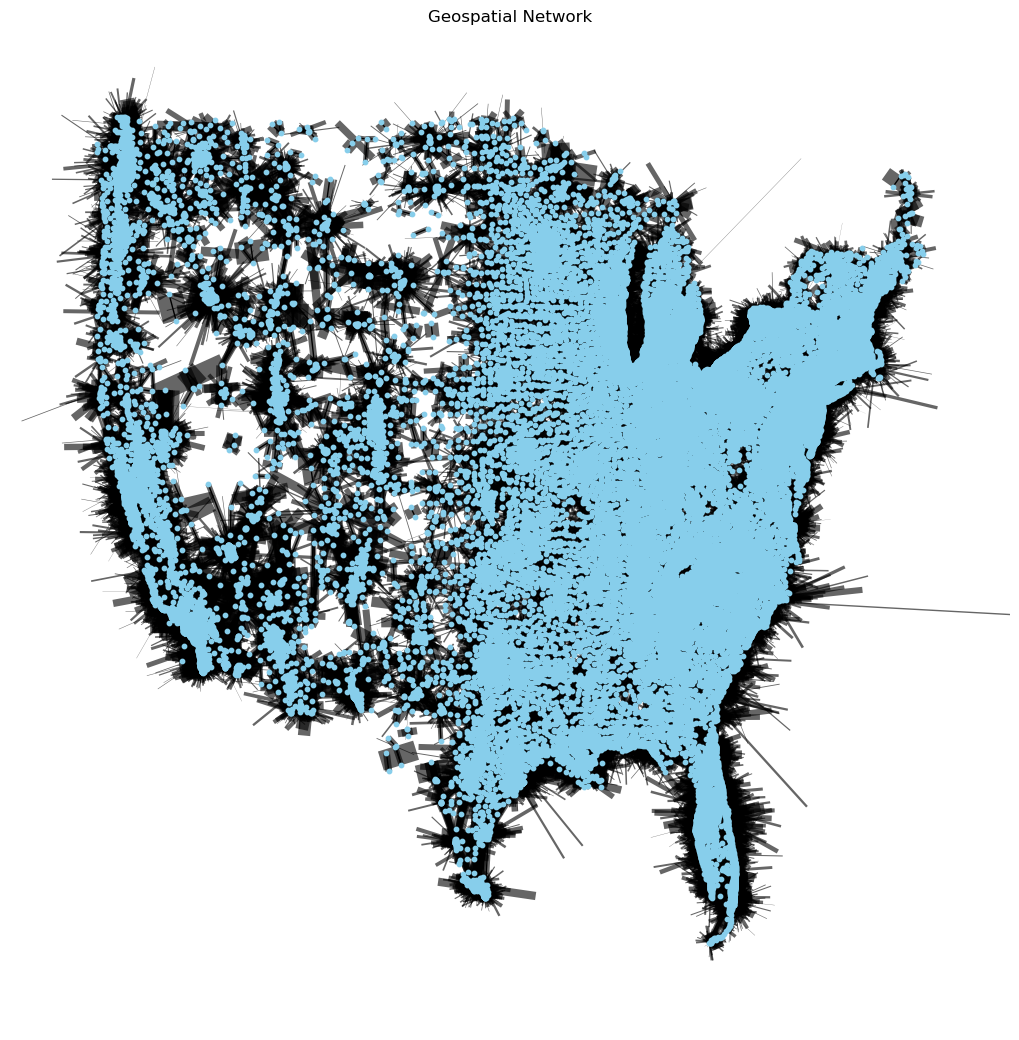

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()


for node_id, attributes in mystery_network.items():
    G.add_node(node_id, pos=attributes['pos'], population=attributes['population'])
    for i, edge in enumerate(attributes['edge_data']['edges']):
        G.add_edge(node_id, edge, weight=attributes['edge_data']['weight'][i], margin=attributes['edge_data']['margin'][i])
pos = nx.get_node_attributes(G, 'pos')

plt.figure(figsize=(10, 10))
nx.draw(G, pos, with_labels=False, node_size=10, node_color="skyblue", font_size=10, font_weight="bold")

edges = G.edges(data=True)
nx.draw_networkx_edges(G, pos, edgelist=edges, width=[e[2]['weight'] / 10 for e in edges], alpha=0.6)

plt.title("Geospatial Network")
plt.show()


________

This task isn't meant to evaluate how well you can visualize some random dataset... it's designed to highlight what visual features you **prioritize** under time constraints. Things like:
- Color
- Text
- Emphasis on specific features
- Informativeness
- Qualitative vs. quantitative features
- etc.

______________
## Color
Color is one of the most powerful tools in data visualization. It allows us to communicate complex information quickly and effectively, but it also carries significant responsibility. The choice of colors can greatly affect the clarity, accessibility, and impact of visualizations. When colors are misused, they can distort the message or exclude viewers, particularly those with color vision deficiencies. In the documentation for `matplotlib`, there's a [great background on color](https://matplotlib.org/stable/users/explain/colors/colors.html)!

![](images/matplotlibcolors.png)

In this lesson, we focus on the importance of using color thoughtfully in data visualizations, including:

- Understand how different colors interact with one another.
- Learn to choose colors that ensure accessibility for people with colorblindness.
- Explore properties such as lightness, hue, and saturation to create visualizations that are aesthetically pleasing and easy to interpret.
- Practice converting between color formats to work efficiently across various platforms and visualization tools.
- By the end of this lesson, you will be able to apply these concepts to create more effective, inclusive, and professional data visualizations that enhance the storytelling power of your data.


__________________
### Simulating colorblindness and color-anomalous viewers

This section provides a tool for analyzing and visualizing colors. It lets you explore various color properties such as lightness, hue, and saturation. Also, this code will let you simulate how colors appear to individuals with different types of colorblindness, offering insights into accessibility and color design considerations.



In [7]:
namedColors = {'aliceblue':'#f0f8ff', 'antiquewhite':'#faebd7', 'aqua':'#0ff',
               'aquamarine':'#7fffd4', 'azure':'#f0ffff', 'beige':'#f5f5dc', 'bisque':'#ffe4c4',
               'black':'#000', 'blanchedalmond':'#ffebcd', 'blue':'#00f', 'blueviolet':'#8a2be2',
               'brown':'#a52a2a', 'burlywood':'#deb887', 'cadetblue':'#5f9ea0', 'chartreuse':'#7fff00',
               'chocolate':'#d2691e', 'coral':'#ff7f50', 'cornflowerblue':'#6495ed', 'cornsilk':'#fff8dc',
               'crimson':'#dc143c', 'cyan':'#0ff', 'darkblue':'#00008b', 'darkcyan':'#008b8b',
               'darkgoldenrod':'#b8860b', 'darkgray':'#a9a9a9', 'darkgrey':'#a9a9a9', 'darkgreen':'#006400',
               'darkkhaki':'#bdb76b', 'darkmagenta':'#8b008b', 'darkolivegreen':'#556b2f', 'darkorange':'#ff8c00',
               'darkorchid':'#9932cc', 'darkred':'#8b0000', 'darksalmon':'#e9967a', 'darkseagreen':'#8fbc8f',
               'darkslateblue':'#483d8b', 'darkslategray':'#2f4f4f', 'darkslategrey':'#2f4f4f',
               'darkturquoise':'#00ced1', 'darkviolet':'#9400d3', 'deeppink':'#ff1493', 'deepskyblue':'#00bfff',
               'dimgray':'#696969', 'dimgrey':'#696969', 'dodgerblue':'#1e90ff', 'firebrick':'#b22222',
               'floralwhite':'#fffaf0', 'forestgreen':'#228b22', 'fuchsia':'#f0f', 'gainsboro':'#dcdcdc',
               'ghostwhite':'#f8f8ff', 'gold':'#ffd700', 'goldenrod':'#daa520', 'gray':'#808080', 'grey':'#808080',
               'green':'#008000', 'greenyellow':'#adff2f', 'honeydew':'#f0fff0', 'hotpink':'#ff69b4',
               'indianred':'#cd5c5c', 'indigo':'#4b0082', 'ivory':'#fffff0', 'khaki':'#f0e68c', 'lavender':'#e6e6fa',
               'lavenderblush':'#fff0f5', 'lawngreen':'#7cfc00', 'lemonchiffon':'#fffacd', 'lightblue':'#add8e6',
               'lightcoral':'#f08080', 'lightcyan':'#e0ffff', 'lightgoldenrodyellow':'#fafad2', 'lightgray':'#d3d3d3',
               'lightgrey':'#d3d3d3', 'lightgreen':'#90ee90', 'lightpink':'#ffb6c1', 'lightsalmon':'#ffa07a',
               'lightseagreen':'#20b2aa', 'lightskyblue':'#87cefa', 'lightslategray':'#789', 'lightslategrey':'#789',
               'lightsteelblue':'#b0c4de', 'lightyellow':'#ffffe0', 'lime':'#0f0', 'limegreen':'#32cd32',
               'linen':'#faf0e6', 'magenta':'#f0f', 'maroon':'#800000', 'mediumaquamarine':'#66cdaa',
               'mediumblue':'#0000cd', 'mediumorchid':'#ba55d3', 'mediumpurple':'#9370d8', 'mediumseagreen':'#3cb371',
               'mediumslateblue':'#7b68ee', 'mediumspringgreen':'#00fa9a', 'mediumturquoise':'#48d1cc',
               'mediumvioletred':'#c71585', 'midnightblue':'#191970', 'mintcream':'#f5fffa', 'mistyrose':'#ffe4e1',
               'moccasin':'#ffe4b5', 'navajowhite':'#ffdead', 'navy':'#000080', 'oldlace':'#fdf5e6', 'olive':'#808000',
               'olivedrab':'#6b8e23', 'orange':'#ffa500', 'orangered':'#ff4500', 'orchid':'#da70d6',
               'palegoldenrod':'#eee8aa', 'palegreen':'#98fb98', 'paleturquoise':'#afeeee', 'palevioletred':'#d87093',
               'papayawhip':'#ffefd5', 'peachpuff':'#ffdab9', 'peru':'#cd853f', 'pink':'#ffc0cb', 'plum':'#dda0dd',
               'powderblue':'#b0e0e6', 'purple':'#800080', 'rebeccapurple':'#639', 'red':'#f00', 'rosybrown':'#bc8f8f',
               'royalblue':'#4169e1', 'saddlebrown':'#8b4513', 'salmon':'#fa8072', 'sandybrown':'#f4a460',
               'seagreen':'#2e8b57', 'seashell':'#fff5ee', 'sienna':'#a0522d', 'silver':'#c0c0c0', 'skyblue':'#87ceeb',
               'slateblue':'#6a5acd', 'slategray':'#708090', 'slategrey':'#708090', 'snow':'#fffafa',
               'springgreen':'#00ff7f', 'steelblue':'#4682b4', 'tan':'#d2b48c', 'teal':'#008080', 'thistle':'#d8bfd8',
               'tomato':'#ff6347', 'turquoise':'#40e0d0', 'violet':'#ee82ee', 'wheat':'#f5deb3', 'white':'#fff',
               'whitesmoke':'#f5f5f5', 'yellow':'#ff0', 'yellowgreen':'#9acd32'}


colorblind_mappings = {'Protanopia':'Dichromacy',
                       'Deuteranopia':'Dichromacy',
                       'Tritanopia':'Dichromacy',
                       'Protanomaly':'Trichromacy',
                       'Deuteranomaly':'Trichromacy',
                       'Tritanomaly':'Trichromacy',
                       'Achromatopsia':'Monochromacy',
                       'Achromatomaly':'Monochromacy'}

all_vals = ['Original Color', 'Protanopia', 'Deuteranopia', #'Tritanopia',
            'Protanomaly', 'Deuteranomaly', #'Tritanomaly',
            'Achromatopsia', 'Achromatomaly', 'Grayscale']

colorblind_rates = {'Original Color':"",
                    'Protanopia':' - m: 2.4%; f: 0.02%',
                    'Deuteranopia':' - m: 1.2%; f: 0.01%',
                    # 'Tritanopia':' - m: 0.001%; f: 0.03%',
                    'Protanomaly':' - m: 1.3%; f: 0.02%',
                    'Deuteranomaly':' - m: 5.0%; f: 0.35%',
                    # 'Tritanomaly':' - m: 0.0001%; f: 0.0001%',
                    'Achromatopsia':' - ~0.003%',
                    'Achromatomaly':'',
                    'Grayscale':''}

In [8]:
# rc('font', **{'family':'serif','serif':['Palatino']}) # if you want serif fonts, uncomment this
# rc('text', usetex=True) # use latex fonts 
rc('axes', axisbelow=True, fc='w')
rc('figure', fc='w')
rc('savefig', fc='w')

In [9]:
# set some image parameters
fs = 10.0
lw = 2.25
fig_w1 = 7.0
fig_h1 = 3.0
al = 0.9
labcol = '.1'

pe1 = [path_effects.Stroke(linewidth=lw*1.1, foreground='w',alpha=al), path_effects.Normal()]
pe2 = [path_effects.Stroke(linewidth=1.0, foreground='w'), path_effects.Normal()]
pe3 = [path_effects.Stroke(linewidth=0.2, foreground='.1'), path_effects.Normal()]

In [10]:
def get_colorblindness_colors(hex_col, colorblind_types='all'):
    """
    Generates color representations for various types of colorblindness.

    Parameters
    ----------
    hex_col (str or tuple)
        The color you wish to check, in hex code format e.g. "#ffffff" or rgb
        format e.g. (1,255,20)

    colorblind_types (str or list)
        If "all", the function returns a dictionary with all of the following:
            Protanopia - ("Dichromat" family)
                The viewer sees no red.
            Deuteranopia - ("Dichromat" family)
                The viewer sees no green.
            Tritanopia - ("Dichromat" family)
                The viewer sees no blue.
            Protanomaly - ("Anomalous Trichromat" family)
                The viewer sees low amounts of red.
            Deuteranomaly - ("Anomalous Trichromat" family).
                The viewer sees low amounts of green.
            Tritanomaly - ("Anomalous Trichromat" family).
                The viewer sees low amounts of blue.
            Achromatopsia - ("Monochromat" family)
                The viewer sees no color at all.
            Achromatomaly - ("Monochromat" family)
                The viewer sees low amounts of color.

    Returns
    -------
    colorblind_output (dict)
        dictionary where the keys are the type of colorblindness and the values
        are the re-colored version of your original hex_col. This also includes
        a grayscale version of the color.
    """
    all_vals = ['Original Color', 'Protanopia', 'Deuteranopia',
                'Protanomaly', 'Deuteranomaly',
                'Achromatopsia', 'Achromatomaly', 'Grayscale']

    if type(hex_col)!=str:
        if len(hex_col)!=3:
            print('Input a hex color please.')
            return ''
        else:
            hex_col = rgb_to_hex(hex_col)
    else:
        if "#" not in hex_col and len(hex_col)!=6:
            try:
                hex_col = namedColors[hex_col]
            except:
                print('Input a hex color please.')
                return ''

    base_url = 'https://convertingcolors.com/'
    hex_url = base_url + 'hex-color-%s.html'%hex_col.replace("#",'')
    print(hex_url)
    reqs = requests.get(hex_url)
    soup = BeautifulSoup(reqs.text, 'html.parser')

    colorblind_sec = soup.find_all('details',{'id':'blindness-simulation'})[0]
    colorblind_labels = [i.text for i in colorblind_sec.find_all('h3')]
    # colorblind_colors = np.unique([i.text for i in colorblind_sec.find_all('div')])
    tmp = np.unique([i.text for i in colorblind_sec.find_all('div')])
    colorblind_colors = [i for i in tmp for x in all_vals[1:] if x in i and all_vals[0] not in i]

    colorblind_output = {"Original Color":hex_col}

    # for i in colorblind_mappings.keys():
    #     for j in colorblind_colors:
    #         # if i in j:
    #         hex_col_j = j
    #         colorblind_output[i] = hex_col_j
    for i in colorblind_mappings.keys():
        for j in colorblind_colors:
            if i in j:
                hex_col_j = "#"+j.split('%')[-1]
                # hex_col_j = j.replace(i,'#')
                colorblind_output[i] = hex_col_j

    if colorblind_types!='all':
        if type(colorblind_types) == str:
            colorblind_types = [colorblind_types]

        new_out = {'Original Color':hex_col}
        for c in colorblind_types:
            new_out[c] = colorblind_output[c]

        colorblind_output = new_out

    colorblind_output['Grayscale'] = hex_to_grayscale(hex_col)
    for xx in all_vals:
        if xx not in list(colorblind_output.keys()):
            colorblind_output[xx] = hex_col

    return {hex_col:colorblind_output}

def rgb_to_hsv(rgb):
    """
    Converts an RGB color to HSV format.

    Parameters
    ----------
    rgb : tuple of ints
        A tuple containing the RGB values (R, G, B) where each value is in the
        range 0 to 255.

    Returns
    -------
    numpy.ndarray
        An array representing the HSV equivalent of the input RGB values.
    """
    rgb = np.array(rgb)
    rgb = rgb.astype('float')
    maxv = np.amax(rgb)
    maxc = np.argmax(rgb)
    minv = np.amin(rgb)
    minc = np.argmin(rgb)

    hsv = np.zeros(rgb.shape, dtype='float')
    hsv[maxc == minc, 0] = np.zeros(hsv[maxc == minc, 0].shape)
    hsv[maxc == 0, 0] = (((rgb[..., 1] - rgb[..., 2]) * 60.0 /\
                          (maxv - minv + np.spacing(1))) % 360.0)[maxc == 0]
    hsv[maxc == 1, 0] = (((rgb[..., 2] - rgb[..., 0]) * 60.0 /\
                          (maxv - minv + np.spacing(1))) + 120.0)[maxc == 1]
    hsv[maxc == 2, 0] = (((rgb[..., 0] - rgb[..., 1]) * 60.0 /\
                          (maxv - minv + np.spacing(1))) + 240.0)[maxc == 2]
    hsv[maxv == 0, 1] = np.zeros(hsv[maxv == 0, 1].shape)
    hsv[maxv != 0, 1] = (1 - minv / (maxv + np.spacing(1)))[maxv != 0]
    hsv[..., 2] = maxv/255

    return hsv

def lightness(hex_col):
    """
    Calculates the perceived lightness of a color.

    Parameters
    ----------
    hex_col : str
        A hex code representing the color (e.g., "#ffffff").

    Returns
    -------
    float
        The perceived lightness of the color, ranging from 0 (dark) to 1 (light).
    """    
    rgb = hex_to_rgb(hex_col)
    r,g,b = rgb
    denominator = 255 * (0.299 + 0.587 + 0.111)**(0.5)
    L = (0.299 * r**2 + 0.587 * g**2 + 0.111 * b**2)**(0.5) / denominator

    return L

def saturation(hex_col):
    """
    Calculates the saturation of a given hex color.

    Parameters
    ----------
    hex_col : str
        A hex code representing the color (e.g., "#ffffff").

    Returns
    -------
    float
        The saturation value ranging from 0 (unsaturated, grayscale) to 1 (fully saturated).
    """
    hsv = rgb_to_hsv(hex_to_rgb(hex_col))

    return hsv[1]

def hue(hex_col):
    """
    Calculates the hue of a given hex color.

    Parameters
    ----------
    hex_col : str
        A hex code representing the color (e.g., "#ffffff").

    Returns
    -------
    float
        The hue value in degrees, ranging from 0 to 360.
    """
    hsv = rgb_to_hsv(hex_to_rgb(hex_col))

    return hsv[0]

def rgb_to_hex(rgb):
    """
    Converts an RGB color to hex format.

    Parameters
    ----------
    rgb : tuple of ints
        A tuple containing the RGB values (R, G, B) where each value is in the
        range 0 to 255.

    Returns
    -------
    str
        The hex code representation of the RGB color.
    """
    r,g,b=rgb

    return '#%02x%02x%02x' % (r,g,b)

def hex_to_rgb(value):
    """
    Converts a hex color code to an RGB tuple.

    Parameters
    ----------
    value : str
        A hex code representing the color (e.g., "#ffffff").

    Returns
    -------
    tuple of ints
        A tuple containing the RGB values (R, G, B) where each value is in the range 0 to 255.
    """
    value = value.lstrip('#')
    lv = len(value)

    return tuple(int(value[i:i+lv//3], 16) for i in range(0, lv, lv//3))

def hex_to_grayscale(hex_col):
    """
    Converts a hex color code to its grayscale equivalent.

    Parameters
    ----------
    hex_col : str
        A hex code representing the color (e.g., "#ffffff").

    Returns
    -------
    str
        The grayscale value of the color as a normalized float (0.0 to 1.0).
    """
    img = hex_to_rgb(hex_col)
    R, G, B = img
    imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B    

    return '%.7f'%(imgGray/255)

In [11]:
all_vals = ['Original Color', 'Protanopia', 'Deuteranopia', 'Tritanopia',
            'Protanomaly', 'Deuteranomaly', 'Tritanomaly',
            'Achromatopsia', 'Achromatomaly', 'Grayscale']

In [12]:
cmap_name = 'Test Colormap 1'

cols1 = ['#DAAA62','#1E638F','#C3687D']
cols1_dict = {}

for col in cols1:
    col1_dict = get_colorblindness_colors(col)
    cols1_dict[col] = col1_dict[col]

https://convertingcolors.com/hex-color-DAAA62.html
https://convertingcolors.com/hex-color-1E638F.html
https://convertingcolors.com/hex-color-C3687D.html


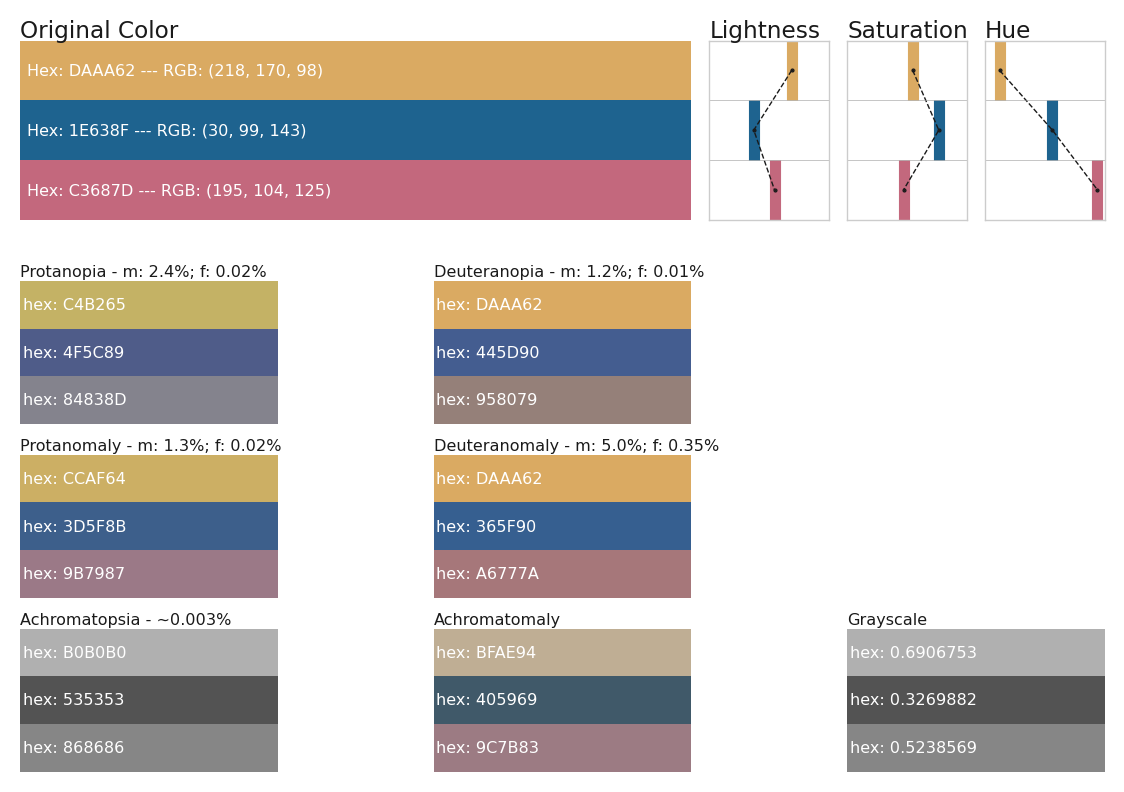

In [13]:
w = 2.0
h = 2.0
ncols = 3
nrows = 3
tups = list(it.product(range(nrows), range(ncols)))
tups = [(i[0]+2,i[1]) for i in tups]

fig = plt.figure(figsize=(7,3.25+len(cols1)*0.5),dpi=200)
plt.subplots_adjust(wspace=0.15,hspace=0.175+0.025*len(cols1))
gs = fig.add_gridspec(5,8,height_ratios=[1.25,0,1,1,1])

for i,cb in enumerate(all_vals):
    if i == 0:
        axi = fig.add_subplot(gs[0,0:5])
    else:
        axi = fig.add_subplot(gs[tups[i-1][0],(tups[i-1][1]*3):(tups[i-1][1]*3)+2])

    if cb in ['Tritanopia','Tritanomaly']:
        axi.set_axis_off()
        continue

    cols1_dict_cb = [cols1_dict[col][cb] for col in cols1]
    rv0 = 1/len(cols1_dict_cb)
    for li,rv in enumerate(np.linspace(rv0,1,len(cols1_dict_cb))):
        lv = rv-rv0
        axi.fill_between([0,1],lv,rv,lw=0,color=cols1_dict_cb[li])
        if i == 0:
            ttt = "Hex: %s"%cols1_dict_cb[li].replace('#','')
            ttt = ttt + ' --- RGB: %s'%str(hex_to_rgb(cols1_dict_cb[li]))
            axi.text(0.99,(lv+rv)/2,ttt,
                     color='w', fontsize='xx-small',ha='left',va='center')
            
        else:
            axi.text(0.99,(lv+rv)/2,"hex: %s"%cols1_dict_cb[li].replace('#',''),
                     color='w', fontsize='xx-small',ha='left',va='center')

    axi.set_xticks([])
    axi.set_yticks([])
    axi.set_xlim(1,0)
    axi.set_ylim(1,0)
    axi.set_axis_off()
    if i == 0:
        axi.set_title(cb,ha='left',x=0,color=labcol,va='top',
                      y=1.01+len(cols1)*0.005,fontsize='small')
    else:
        axi.set_title(cb+colorblind_rates[cb],ha='left',x=0,color=labcol,
                      va='top',y=1.0,fontsize='xx-small')

lightn = [lightness(c) for c in cols1]
saturn = [saturation(c) for c in cols1]
huen = [hue(c) for c in cols1]
titles = ['Lightness','Saturation','Hue']
ylims = [(-0.05, 1.05),(-0.05, 1.05),(-10, 370)]
for vi,v in enumerate([lightn,saturn,huen]):
    axi = fig.add_subplot(gs[0,vi+5])
    axi.vlines(v,[i+0 for i in range(len(cols1))],
                 [i+1 for i in range(len(cols1))], color=cols1, lw=4)
    axi.plot(v,[i+0.5 for i in range(len(cols1))],color=labcol,
             lw=0.5, ls='--',marker='.',markersize=1)

    axi.set_title(titles[vi],ha='left',x=0,color=labcol,va='top',
                   y=1.01+len(cols1)*0.005,fontsize='small')

    axi.set_ylim(len(cols1),0)
    axi.hlines(np.linspace(1,len(cols1),len(cols1)),
               ylims[vi][0],ylims[vi][1], lw=0.2, color='.6')
    axi.set_xlim(ylims[vi][0],ylims[vi][1])
    axi.set_xticks([])
    axi.set_yticks([])
    axi.tick_params(pad=2, colors='.3', length=0)
    for r in ['bottom','top','right','left']:
        axi.spines[r].set_color('.8')
        axi.spines[r].set_linewidth(0.5)


plt.savefig('images/pngs/color_explorer_%s.png'%cmap_name.replace(' ',''),
            dpi=600,bbox_inches='tight')
plt.savefig('images/pdfs/color_explorer_%s.pdf'%cmap_name.replace(' ',''),
            bbox_inches='tight')
plt.show()

In [25]:
cmap_name = 'Test Colormap 2'

cols1 = ['#008795', '#4092aa', '#629cc0', '#7fa6d6',
         '#e69d93', '#dea8ab', '#d5b4c4', '#c8c0dd']
cols1_dict = {}
for col in cols1:
    col1_dict = get_colorblindness_colors(col)
    cols1_dict[col] = col1_dict[col]

https://convertingcolors.com/hex-color-008795.html
https://convertingcolors.com/hex-color-4092aa.html
https://convertingcolors.com/hex-color-629cc0.html
https://convertingcolors.com/hex-color-7fa6d6.html
https://convertingcolors.com/hex-color-e69d93.html
https://convertingcolors.com/hex-color-dea8ab.html
https://convertingcolors.com/hex-color-d5b4c4.html
https://convertingcolors.com/hex-color-c8c0dd.html


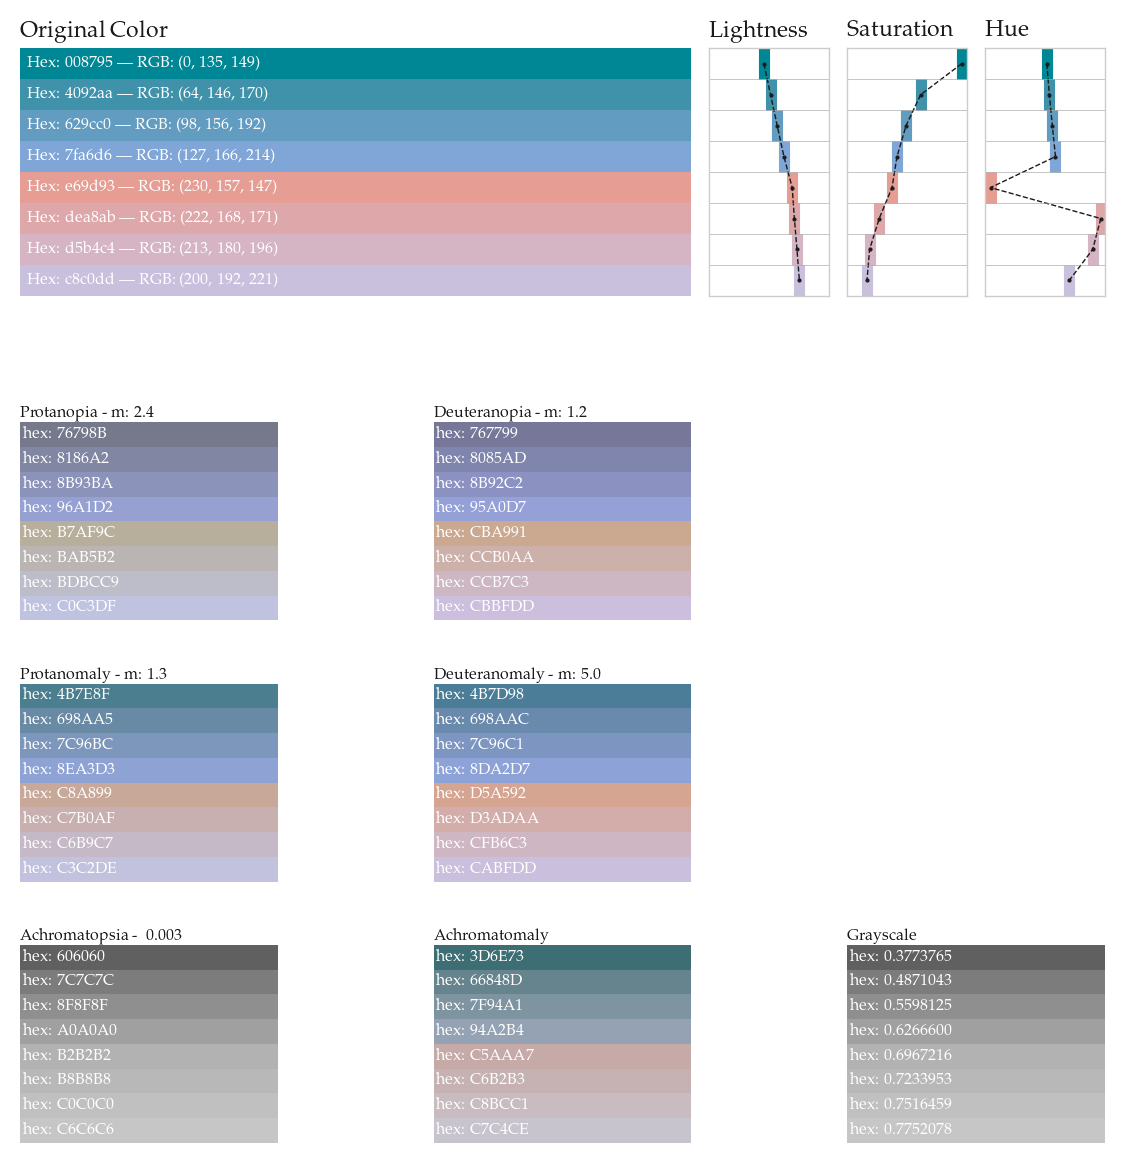

In [12]:
w = 2.0
h = 2.0
ncols = 3
nrows = 3
tups = list(it.product(range(nrows), range(ncols)))
tups = [(i[0]+2,i[1]) for i in tups]

fig = plt.figure(figsize=(7,3.25+len(cols1)*0.5),dpi=200)
plt.subplots_adjust(wspace=0.15,hspace=0.175+0.025*len(cols1))
gs = fig.add_gridspec(5,8,height_ratios=[1.25,0,1,1,1])

for i,cb in enumerate(all_vals):
    if i == 0:
        axi = fig.add_subplot(gs[0,0:5])
    else:
        axi = fig.add_subplot(gs[tups[i-1][0],(tups[i-1][1]*3):(tups[i-1][1]*3)+2])

    if cb in ['Tritanopia','Tritanomaly']:
        axi.set_axis_off()
        continue

    cols1_dict_cb = [cols1_dict[col][cb] for col in cols1]
    rv0 = 1/len(cols1_dict_cb)
    for li,rv in enumerate(np.linspace(rv0,1,len(cols1_dict_cb))):
        lv = rv-rv0
        axi.fill_between([0,1],lv,rv,lw=0,color=cols1_dict_cb[li])
        if i == 0:
            ttt = "Hex: %s"%cols1_dict_cb[li].replace('#','')
            ttt = ttt + ' --- RGB: %s'%str(hex_to_rgb(cols1_dict_cb[li]))
            axi.text(0.99,(lv+rv)/2,ttt,
                     color='w', fontsize='xx-small',ha='left',va='center')
            
        else:
            axi.text(0.99,(lv+rv)/2,"hex: %s"%cols1_dict_cb[li].replace('#',''),
                     color='w', fontsize='xx-small',ha='left',va='center')

    axi.set_xticks([])
    axi.set_yticks([])
    axi.set_xlim(1,0)
    axi.set_ylim(1,0)
    axi.set_axis_off()
    if i == 0:
        axi.set_title(cb,ha='left',x=0,color=labcol,va='top',
                      y=1.01+len(cols1)*0.005,fontsize='small')
    else:
        axi.set_title(cb+colorblind_rates[cb],ha='left',x=0,color=labcol,
                      va='top',y=1.0,fontsize='xx-small')

lightn = [lightness(c) for c in cols1]
saturn = [saturation(c) for c in cols1]
huen = [hue(c) for c in cols1]
titles = ['Lightness','Saturation','Hue']
ylims = [(-0.05, 1.05),(-0.05, 1.05),(-10, 370)]
for vi,v in enumerate([lightn,saturn,huen]):
    axi = fig.add_subplot(gs[0,vi+5])
    axi.vlines(v,[i+0 for i in range(len(cols1))],
                 [i+1 for i in range(len(cols1))], color=cols1, lw=4)
    axi.plot(v,[i+0.5 for i in range(len(cols1))],color=labcol,
             lw=0.5, ls='--',marker='.',markersize=1)

    axi.set_title(titles[vi],ha='left',x=0,color=labcol,va='top',
                   y=1.01+len(cols1)*0.005,fontsize='small')

    axi.set_ylim(len(cols1),0)
    axi.hlines(np.linspace(1,len(cols1),len(cols1)),
               ylims[vi][0],ylims[vi][1], lw=0.2, color='.6')
    axi.set_xlim(ylims[vi][0],ylims[vi][1])
    axi.set_xticks([])
    axi.set_yticks([])
    axi.tick_params(pad=2, colors='.3', length=0)
    for r in ['bottom','top','right','left']:
        axi.spines[r].set_color('.8')
        axi.spines[r].set_linewidth(0.5)


plt.savefig('images/pngs/color_explorer_%s.png'%cmap_name.replace(' ',''),
            dpi=600,bbox_inches='tight')
plt.savefig('images/pdfs/color_explorer_%s.pdf'%cmap_name.replace(' ',''),
            bbox_inches='tight')
plt.show()

_______________

## Network visualization - Theory

### Plotting synthetic data: Network generative models

*Beyond `nx.draw(G)`*

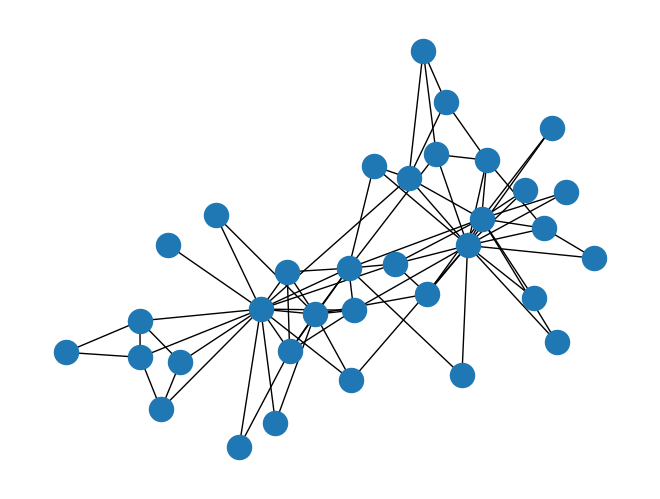

In [14]:
G = nx.karate_club_graph()
nx.draw(G)

**Case study:** I want to plot a pedagogical figure showing the effect that $p$ has on the resulting graphs sampled from $G(n,p)$. I'd like to visualize a number line, with some arrows to networks that are sampled with different parameterizations of $p$.

**How to do this?** What would I need?

1. Subplots
2. Visualize networks under different parameters of $p$ (maybe a loop?)
3. A horizontal line at the bottom of the figure
4. Arrows pointing to the right networks (subplots)

______

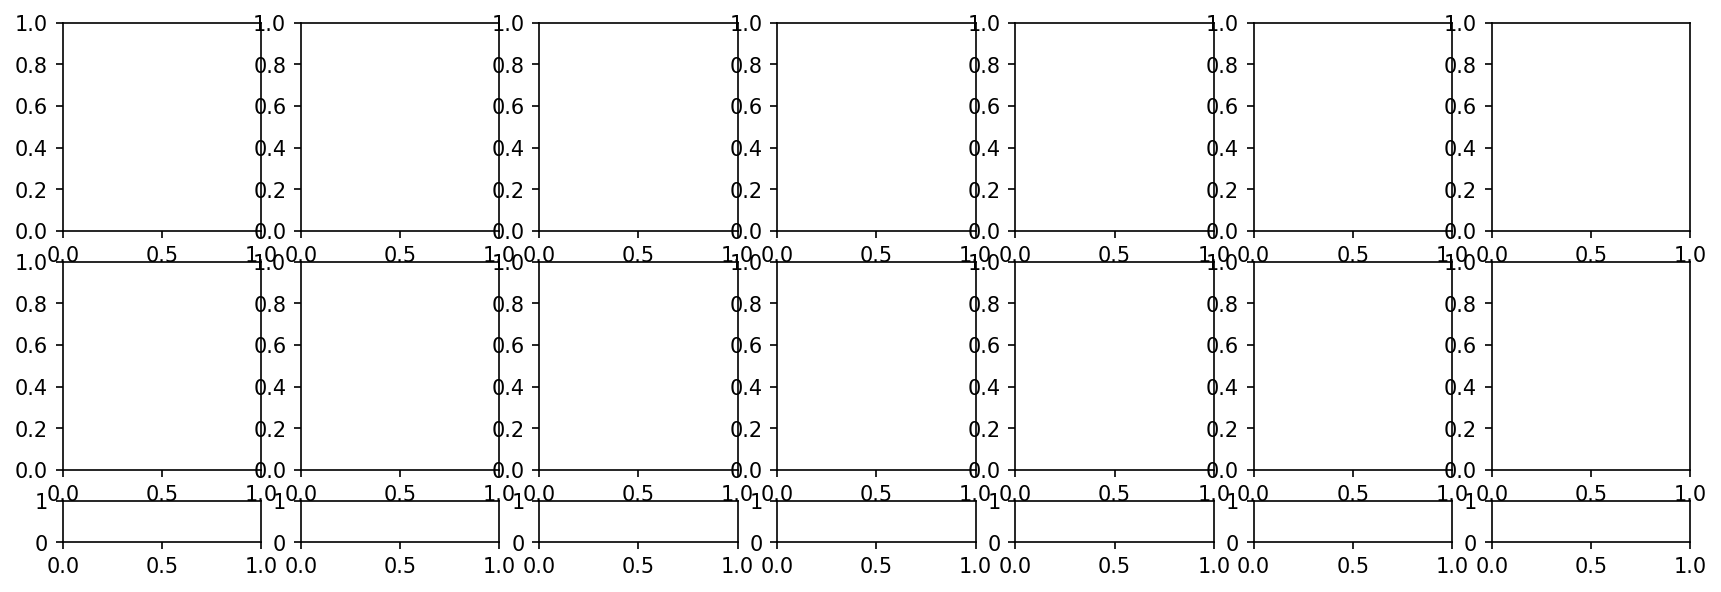

In [18]:
# let's start with some subplots
w = 2.0; h = 2.0
ncols = 7; nrows = 3

# put all those axis indices into a list called tups
tups = list(it.product(range(nrows), range(ncols)))

# define the figure!
fig, ax = plt.subplots(nrows,ncols,figsize=(14,4.5),dpi=150,
                       gridspec_kw={'height_ratios':[1.0, 1.0, 0.2]}) # set different height ratios of the rows

plt.show()

Hmmm... Okay how about I only visualize certain subplots? Perhaps at alternating heights to space the visualization out slightly.

If I want that, I first need to specifiy which tuples of subplots the networks will be plotted in.

In [20]:
plot_tups

[(0, 0), (1, 1), (0, 2), (1, 3), (0, 4), (1, 5), (0, 6)]

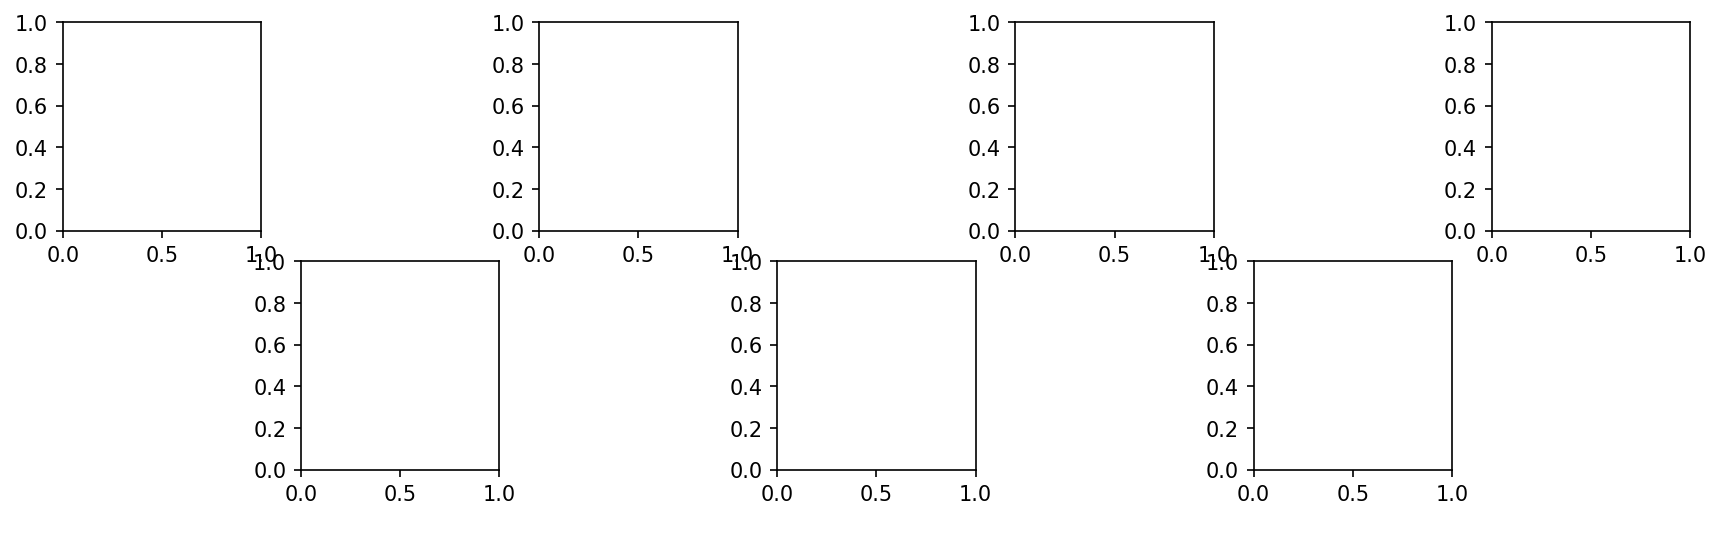

In [19]:
# let's start with some subplots
w = 2.0; h = 2.0
ncols = 7; nrows = 3

# put all those axis indices into a list called tups
tups = list(it.product(range(nrows), range(ncols)))

### create a subset of tups that the networks will be plotted in
### let's say every other subplot (up/down/up/down etc.)
plot_tups = [i for i in tups[::2] if i[0]<(nrows-1)]
plot_tups = sorted(plot_tups, key=lambda x: x[1]) 


# define the figure!
fig, ax = plt.subplots(nrows,ncols,figsize=(14,4.5),dpi=150,
                       gridspec_kw={'height_ratios':[1.0, 1.0, 0.2]}) # set different height ratios of the rows


# try it out! set the axes off that you dont wanna see
for a in tups:
    if a in plot_tups:
        continue
    else:
        axi = ax[a]
        axi.set_axis_off()



plt.show()

Ahhh but wait! Where did my little bottom row of short subplots go? Can I merge those all into a single long + thin subplot spanning the bottom?

**Answer:** *Yes*. Using `gridspec` https://matplotlib.org/3.5.0/tutorials/intermediate/gridspec.html

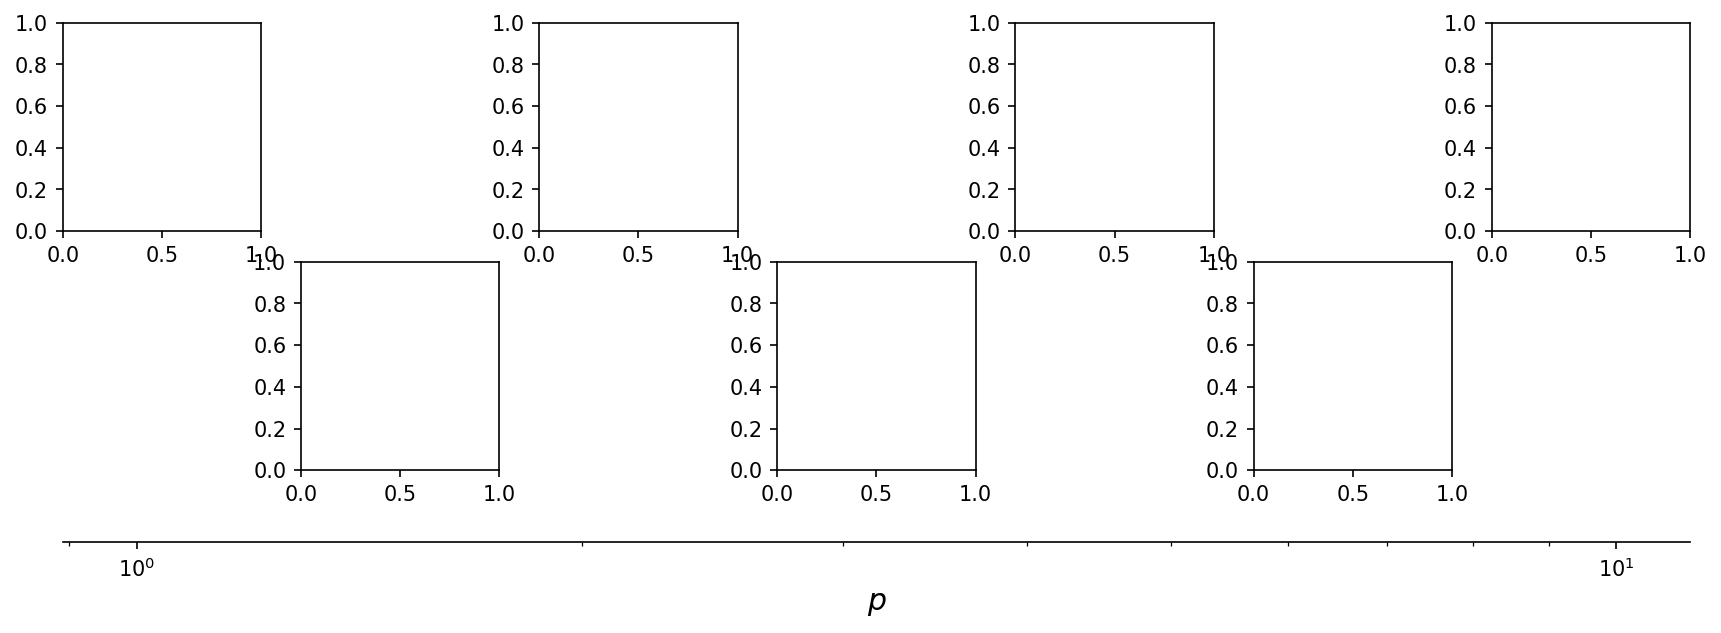

In [22]:
# let's start with some subplots
w = 2.0; h = 2.0
ncols = 7; nrows = 3

# put all those axis indices into a list called tups
tups = list(it.product(range(nrows), range(ncols)))

# create a subset of tups that the networks will be plotted in
# let's say every other subplot (up/down/up/down etc.)
plot_tups = [i for i in tups[::2] if i[0]<(nrows-1)]
plot_tups = sorted(plot_tups, key=lambda x: x[1]) 


# define the figure!
fig, ax = plt.subplots(nrows,ncols,figsize=(14,4.5),dpi=150,
                       gridspec_kw={'height_ratios':[1.0, 1.0, 0.2]}) # set different height ratios of the rows


### create a new "gridspec" object, specified as follows
gs = fig.add_gridspec(nrows, ncols, height_ratios=[1,1,0.2])

### add the axis to the plot, based on the gridspec object you made
axi0 = fig.add_subplot(gs[(nrows-1),
                          0:(ncols)])

### customize your axis
axi0.set_xscale('log')
axi0.set_yticks([])
axi0.spines['top'].set_visible(False)
axi0.spines['right'].set_visible(False)
axi0.spines['left'].set_visible(False)
axi0.set_xlabel(r'$p$',fontsize='x-large')




# try it out! set the axes off that you dont wanna see
for a in tups:
    if a in plot_tups:
        continue
    else:
        axi = ax[a]
        axi.set_axis_off()



plt.show()

Nice! I now have my number line back.

*Note:* In the final figure, I change the gridspec call slightly to better align with the network visualizations.

**Last Major Step** (before customizations): Plot some networks and add some arrows!

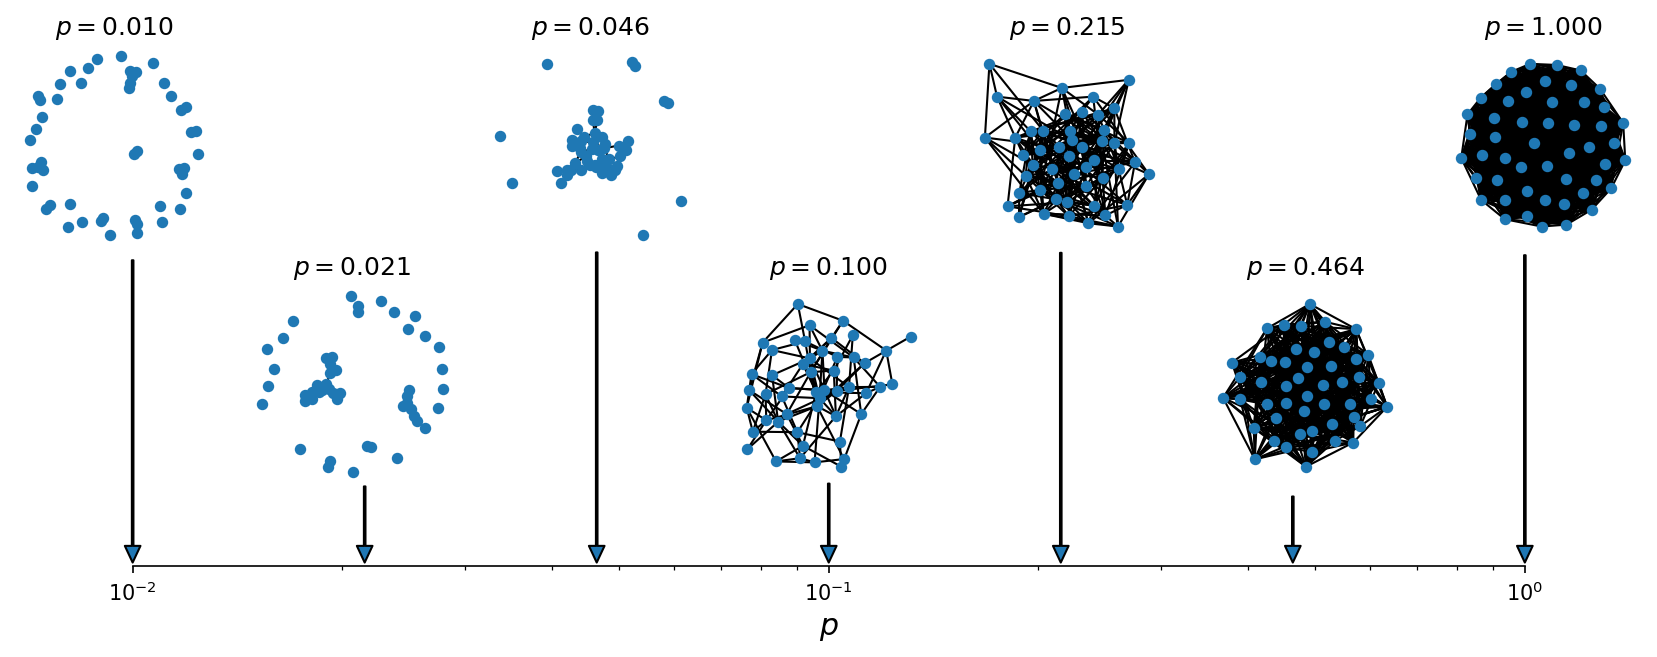

In [28]:
# let's start with some subplots
w = 2.0; h = 2.0
ncols = 7; nrows = 3

# put all those axis indices into a list called tups
tups = list(it.product(range(nrows), range(ncols)))

# create a subset of tups that the networks will be plotted in
# let's say every other subplot (up/down/up/down etc.)
plot_tups = [i for i in tups[::2] if i[0]<(nrows-1)]
plot_tups = sorted(plot_tups, key=lambda x: x[1]) 


# define the figure!
fig, ax = plt.subplots(nrows,ncols,figsize=(14,4.5),dpi=150,
                       gridspec_kw={'height_ratios':[1.0, 1.0, 0.2]}) # set different height ratios of the rows


# create a new "gridspec" object, specified as follows
plt.subplots_adjust(wspace=0.2,hspace=0.3)
gs = fig.add_gridspec(nrows, ncols*2, height_ratios=[1,1,0.2])

# add the axis to the plot, based on the gridspec object you made
axi0 = fig.add_subplot(gs[(nrows-1), 1:(ncols*2-1)])

# customize your axis
axi0.set_xscale('log')
axi0.set_yticks([])
axi0.spines['top'].set_visible(False)
axi0.spines['right'].set_visible(False)
axi0.spines['left'].set_visible(False)
axi0.set_xlabel(r'$p$',fontsize='x-large')


############ NETWORK PLOTTING TIME! ##############
N = 50
params = np.logspace(-2,0,7).round(4) # this will be my list of p to use

for i,a in enumerate(plot_tups):
    axi = ax[a]
    param = params[i]
    G_i = nx.erdos_renyi_graph(N, param)

    nx.draw(G_i, node_size=20, ax=axi)
    axi.set_axis_off()
    axi.set_title(r"$p=%0.3f$"%param)

    # Add arrows from bottom subplot to network graphs
    net_x = a[1] / (ncols-1)  # Normalized position of the network subplot
    
    # Create arrows from bottom plot to networks
    net_y = 7.75 if a[0] == 0 else 1.75
    net_y += np.random.rand()*0.5
    axi0.annotate('', xy=(net_x, 0.1), xytext=(net_x, net_y),
                  xycoords='axes fraction', textcoords='axes fraction',
                  arrowprops=dict(width=0.75, headwidth=7.5, headlength=8))

axi0.set_xlim(1e-2, 1e0)
#axi0.set_ylim(0,2)

    
# try it out! set the axes off that you dont wanna see
for a in tups:
    if a in plot_tups:
        continue
    else:
        axi = ax[a]
        axi.set_axis_off()



plt.show()

***We did it!*** See below for some fancier customization, but the gist of the visualization is done.
______________

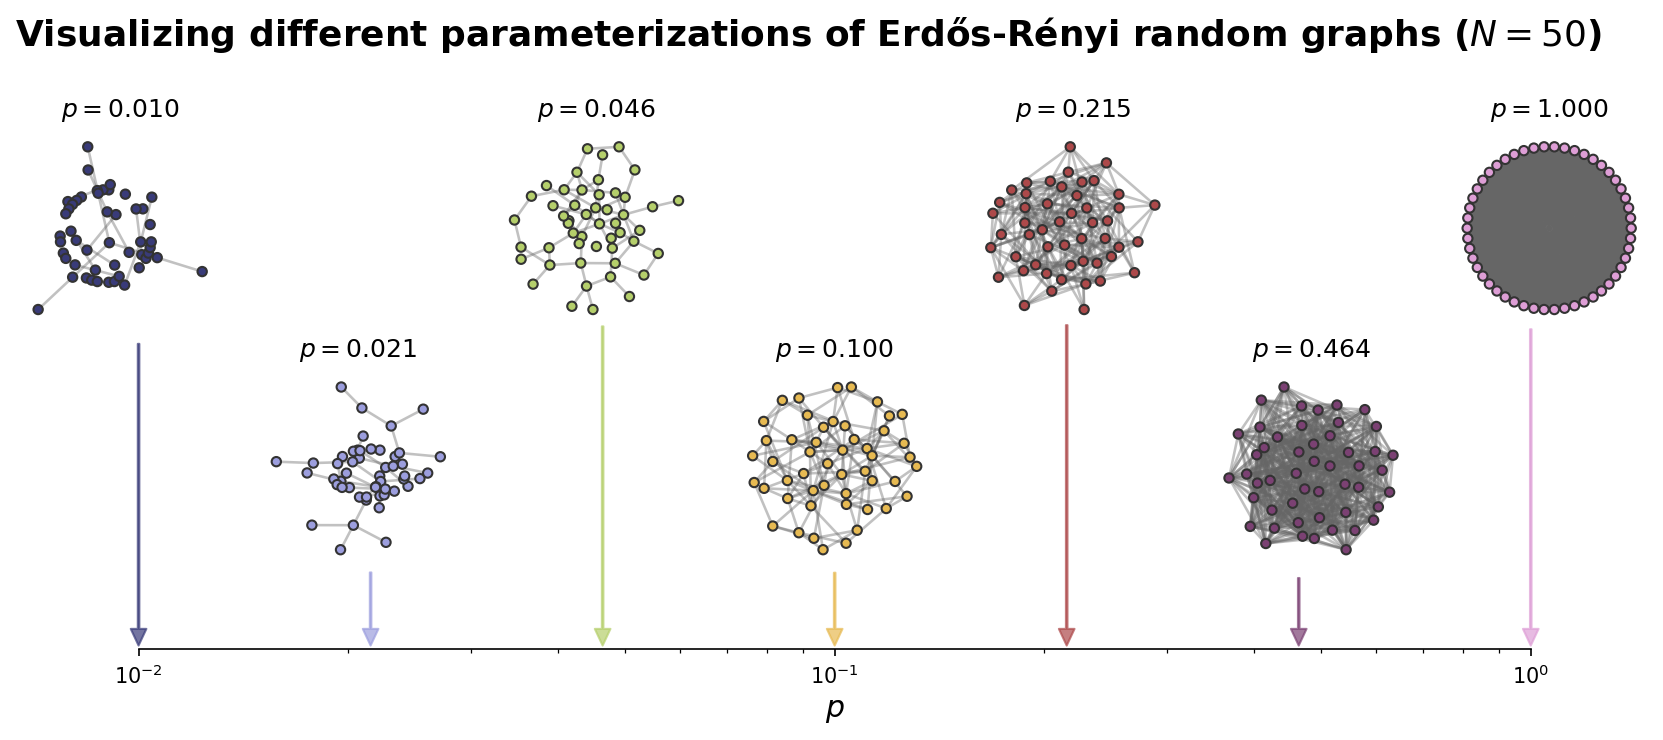

In [29]:
w = 2.0
h = 2.0
ncols = 7
nrows = 3
tups = list(it.product(range(nrows), range(ncols)))


fig, ax = plt.subplots(nrows,ncols,figsize=(14,4.5),gridspec_kw={'height_ratios':[1,1,0.2]},dpi=150)
fig.patch.set_facecolor('white')
for axi in ax.flat:
    axi.set_facecolor('white')

plt.subplots_adjust(wspace=0.2,hspace=0.3)
gs = fig.add_gridspec(nrows, ncols*2, height_ratios=[1,1,0.2])

axi0 = fig.add_subplot(gs[(nrows-1), 1:(ncols*2-1)])
axi0.set_xscale('log')
axi0.set_yticks([])
axi0.spines['top'].set_visible(False)
axi0.spines['right'].set_visible(False)
axi0.spines['left'].set_visible(False)
axi0.set_xlabel(r'$p$',fontsize='x-large')


plot_tups = [i for i in tups[::2] if i[0]<(nrows-1)]
plot_tups = sorted(plot_tups, key=lambda x: x[1]) 

N = 50
params = np.logspace(-2,0,7).round(4)
cols = plt.cm.tab20b(np.linspace(0,1,len(params)))

i = 0
for a in plot_tups:
    axi = ax[a]
    param = params[i]
    G_i = nx.erdos_renyi_graph(N, param)

    nc = cols[i]
    pos = nx.kamada_kawai_layout(G_i)
    nx.draw_networkx_nodes(G_i, pos, node_size=20, node_color=[nc]*N, edgecolors='.2', ax=axi)
    nx.draw_networkx_edges(G_i, pos, width=1.25, edge_color='.4', alpha=0.4, ax=axi)
    axi.set_axis_off()
    axi.set_title(r"$p=%0.3f$"%param)

    # Add arrows from bottom subplot to network graphs
    param_x = param  # The x position in the bottom subplot corresponding to the parameter p
    net_x = a[1] / (ncols-1)  # Normalized position of the network subplot
    
    # Create arrows from bottom plot to networks
    net_y = 7.75 if a[0] == 0 else 1.75
    net_y += np.random.rand()*0.5
    axi0.annotate('', xy=(net_x, 0.1), xytext=(net_x, net_y), xycoords='axes fraction',
                  textcoords='axes fraction', arrowprops=dict(fc=nc, ec=nc, alpha=0.7, width=0.75,
                                                              headwidth=7.5, headlength=8))
    
    i += 1

axi0.set_xlim(1e-2, 1e0)
axi0.set_ylim(0,1)
    
for a in tups:
    if a in plot_tups:
        continue
    else:
        axi = ax[a]
        axi.set_axis_off()

plt.suptitle('Visualizing different parameterizations of Erdős-Rényi random graphs ($N=%i$)'%N,
             fontsize='xx-large', fontweight='bold', y=1.05)


plt.savefig('images/pngs/er_span_viz.png',dpi=425,bbox_inches='tight')
plt.savefig('images/pdfs/er_span_viz.pdf',dpi=425,bbox_inches='tight')

plt.show()

______________
What about the same figure, but with nonlinear preferential attachment?

In [19]:
def preferential_attachment_network(N, alpha=1.0, m=1):
    r"""
    Generates a network based off of a preferential attachment growth rule.
    Under this growth rule, new nodes place their $m$ edges to nodes already
    present in the graph, G, with a probability proportional to $k^\alpha$.

    Parameters
    ----------
    N (int): the desired number of nodes in the final network
    alpha (float): the exponent of preferential attachment. When alpha is less
                   than 1.0, we describe it as sublinear preferential
                   attachment. At alpha > 1.0, it is superlinear preferential
                   attachment. And at alpha=1.0, the network was grown under
                   linear preferential attachment, as in the case of
                   Barabasi-Albert networks.
    m (int): the number of new links that each new node joins the network with.

    Returns
    -------
    G (nx.Graph): a graph grown under preferential attachment.

    """

    G = nx.Graph()
    G = nx.complete_graph(m+1)

    for node_i in range(m+1, N):
        degrees = np.array(list(dict(G.degree()).values()))
        probs = (degrees**alpha) / sum(degrees**alpha)
        eijs = np.random.choice(
                    G.number_of_nodes(), size=(m,),
                    replace=False, p=probs)
        for node_j in eijs:
            G.add_edge(node_i, node_j)

    return G

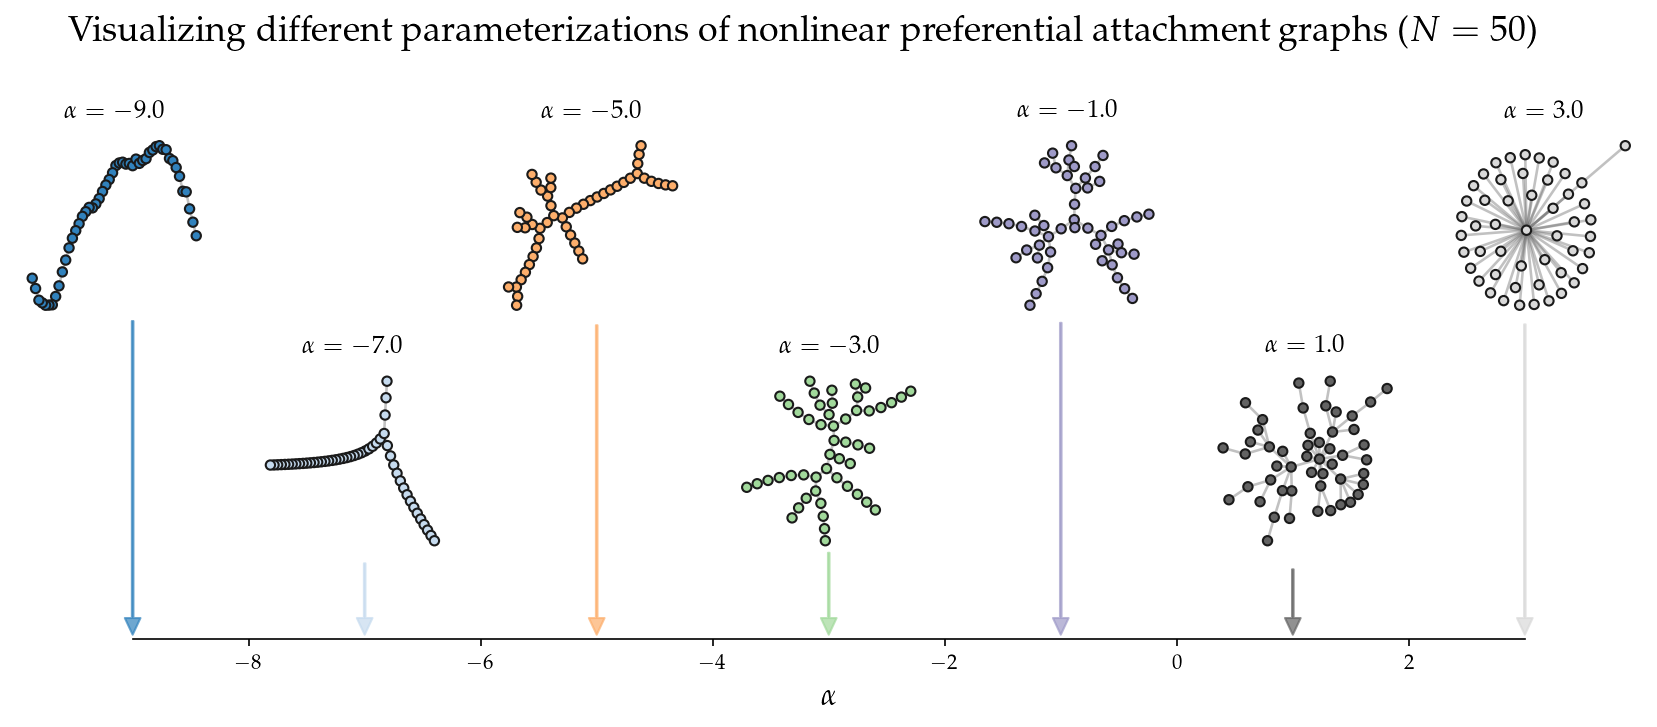

In [20]:
w = 2.0
h = 2.0
ncols = 7
nrows = 3
tups = list(it.product(range(nrows), range(ncols)))

fig, ax = plt.subplots(nrows,ncols,figsize=(14,4.5),gridspec_kw={'height_ratios':[1,1,0.2]},dpi=150)
fig.patch.set_facecolor('white')
for axi in ax.flat:
    axi.set_facecolor('white')

plt.subplots_adjust(wspace=0.2,hspace=0.3)
gs = fig.add_gridspec(nrows, ncols*2, height_ratios=[1,1,0.2])

axi0 = fig.add_subplot(gs[(nrows-1), 1:(ncols*2-1)])
axi0.set_yticks([])
axi0.spines['top'].set_visible(False)
axi0.spines['right'].set_visible(False)
axi0.spines['left'].set_visible(False)
axi0.set_xlabel(r'$\alpha$',fontsize='x-large')


plot_tups = [i for i in tups[::2] if i[0]<(nrows-1)]
plot_tups = sorted(plot_tups, key=lambda x: x[1]) 

N = 50
params = [-9.,-7.,-5.,-3.,-1.,1.,3.]
cols = plt.cm.tab20c(np.linspace(0,1,len(params)))

i = 0
for a in plot_tups:
    axi = ax[a]
    param = params[i]
    G_i = preferential_attachment_network(N, param, 1)

    nc = cols[i]
    pos = nx.kamada_kawai_layout(G_i)
    nx.draw_networkx_nodes(G_i, pos, node_size=20, node_color=[nc]*N, edgecolors='.1', ax=axi)
    nx.draw_networkx_edges(G_i, pos, width=1.25, edge_color='.4', alpha=0.4, ax=axi)
    axi.set_axis_off()
    axi.set_title(r"$\alpha=%0.1f$"%param)

    # Add arrows from bottom subplot to network graphs
    param_x = param  # The x position in the bottom subplot corresponding to the parameter p
    net_x = a[1] / (ncols-1)  # Normalized position of the network subplot
    
    # Create arrows from bottom plot to networks
    net_y = 7.75 if a[0] == 0 else 1.75
    net_y += np.random.rand()*0.5
    axi0.annotate('', xy=(net_x, 0.1), xytext=(net_x, net_y), xycoords='axes fraction',
                  textcoords='axes fraction', arrowprops=dict(fc=nc, ec=nc, alpha=0.7, width=0.75,
                                                              headwidth=7.5, headlength=8))
    
    i += 1

axi0.set_xlim(-9,3)
axi0.set_ylim(0,1)
    
for a in tups:
    if a in plot_tups:
        continue
    else:
        axi = ax[a]
        axi.set_axis_off()

plt.suptitle('Visualizing different parameterizations of nonlinear preferential attachment graphs ($N=%i$)'%N,
             fontsize='xx-large', fontweight='bold', y=1.05)


plt.savefig('images/pngs/prefattach_span_viz.png',dpi=425,bbox_inches='tight')
plt.savefig('images/pdfs/prefattach_span_viz.pdf',dpi=425,bbox_inches='tight')

plt.show()

## Network visualization - Data

### 1. Mystery network from above: The U.S. Commute Network

In [30]:
import pickle
with open('data/mystery.pickle', 'rb') as handle:
    commute_network = pickle.load(handle)

In [31]:
G = nx.DiGraph()
for i in list(commute_network.keys()):
    G.add_node(i, pos=commute_network[i]['pos'], 
                  population=commute_network[i]['population'],
                  state=commute_network[i]['state'],
                  housing=commute_network[i]['housing'])
    edge_data = commute_network[i]['edge_data']
    for j in range(len(edge_data['edges'])):
        G.add_edge(i, edge_data['edges'][j],
                   weight=edge_data['weight'][j],
                   margin=edge_data['margin'][j])

pos = dict(nx.get_node_attributes(G,'pos'))
xs = list(list(zip(*list(pos.values())))[0])
ys = list(list(zip(*list(pos.values())))[1])

gp = nx.to_undirected(G)

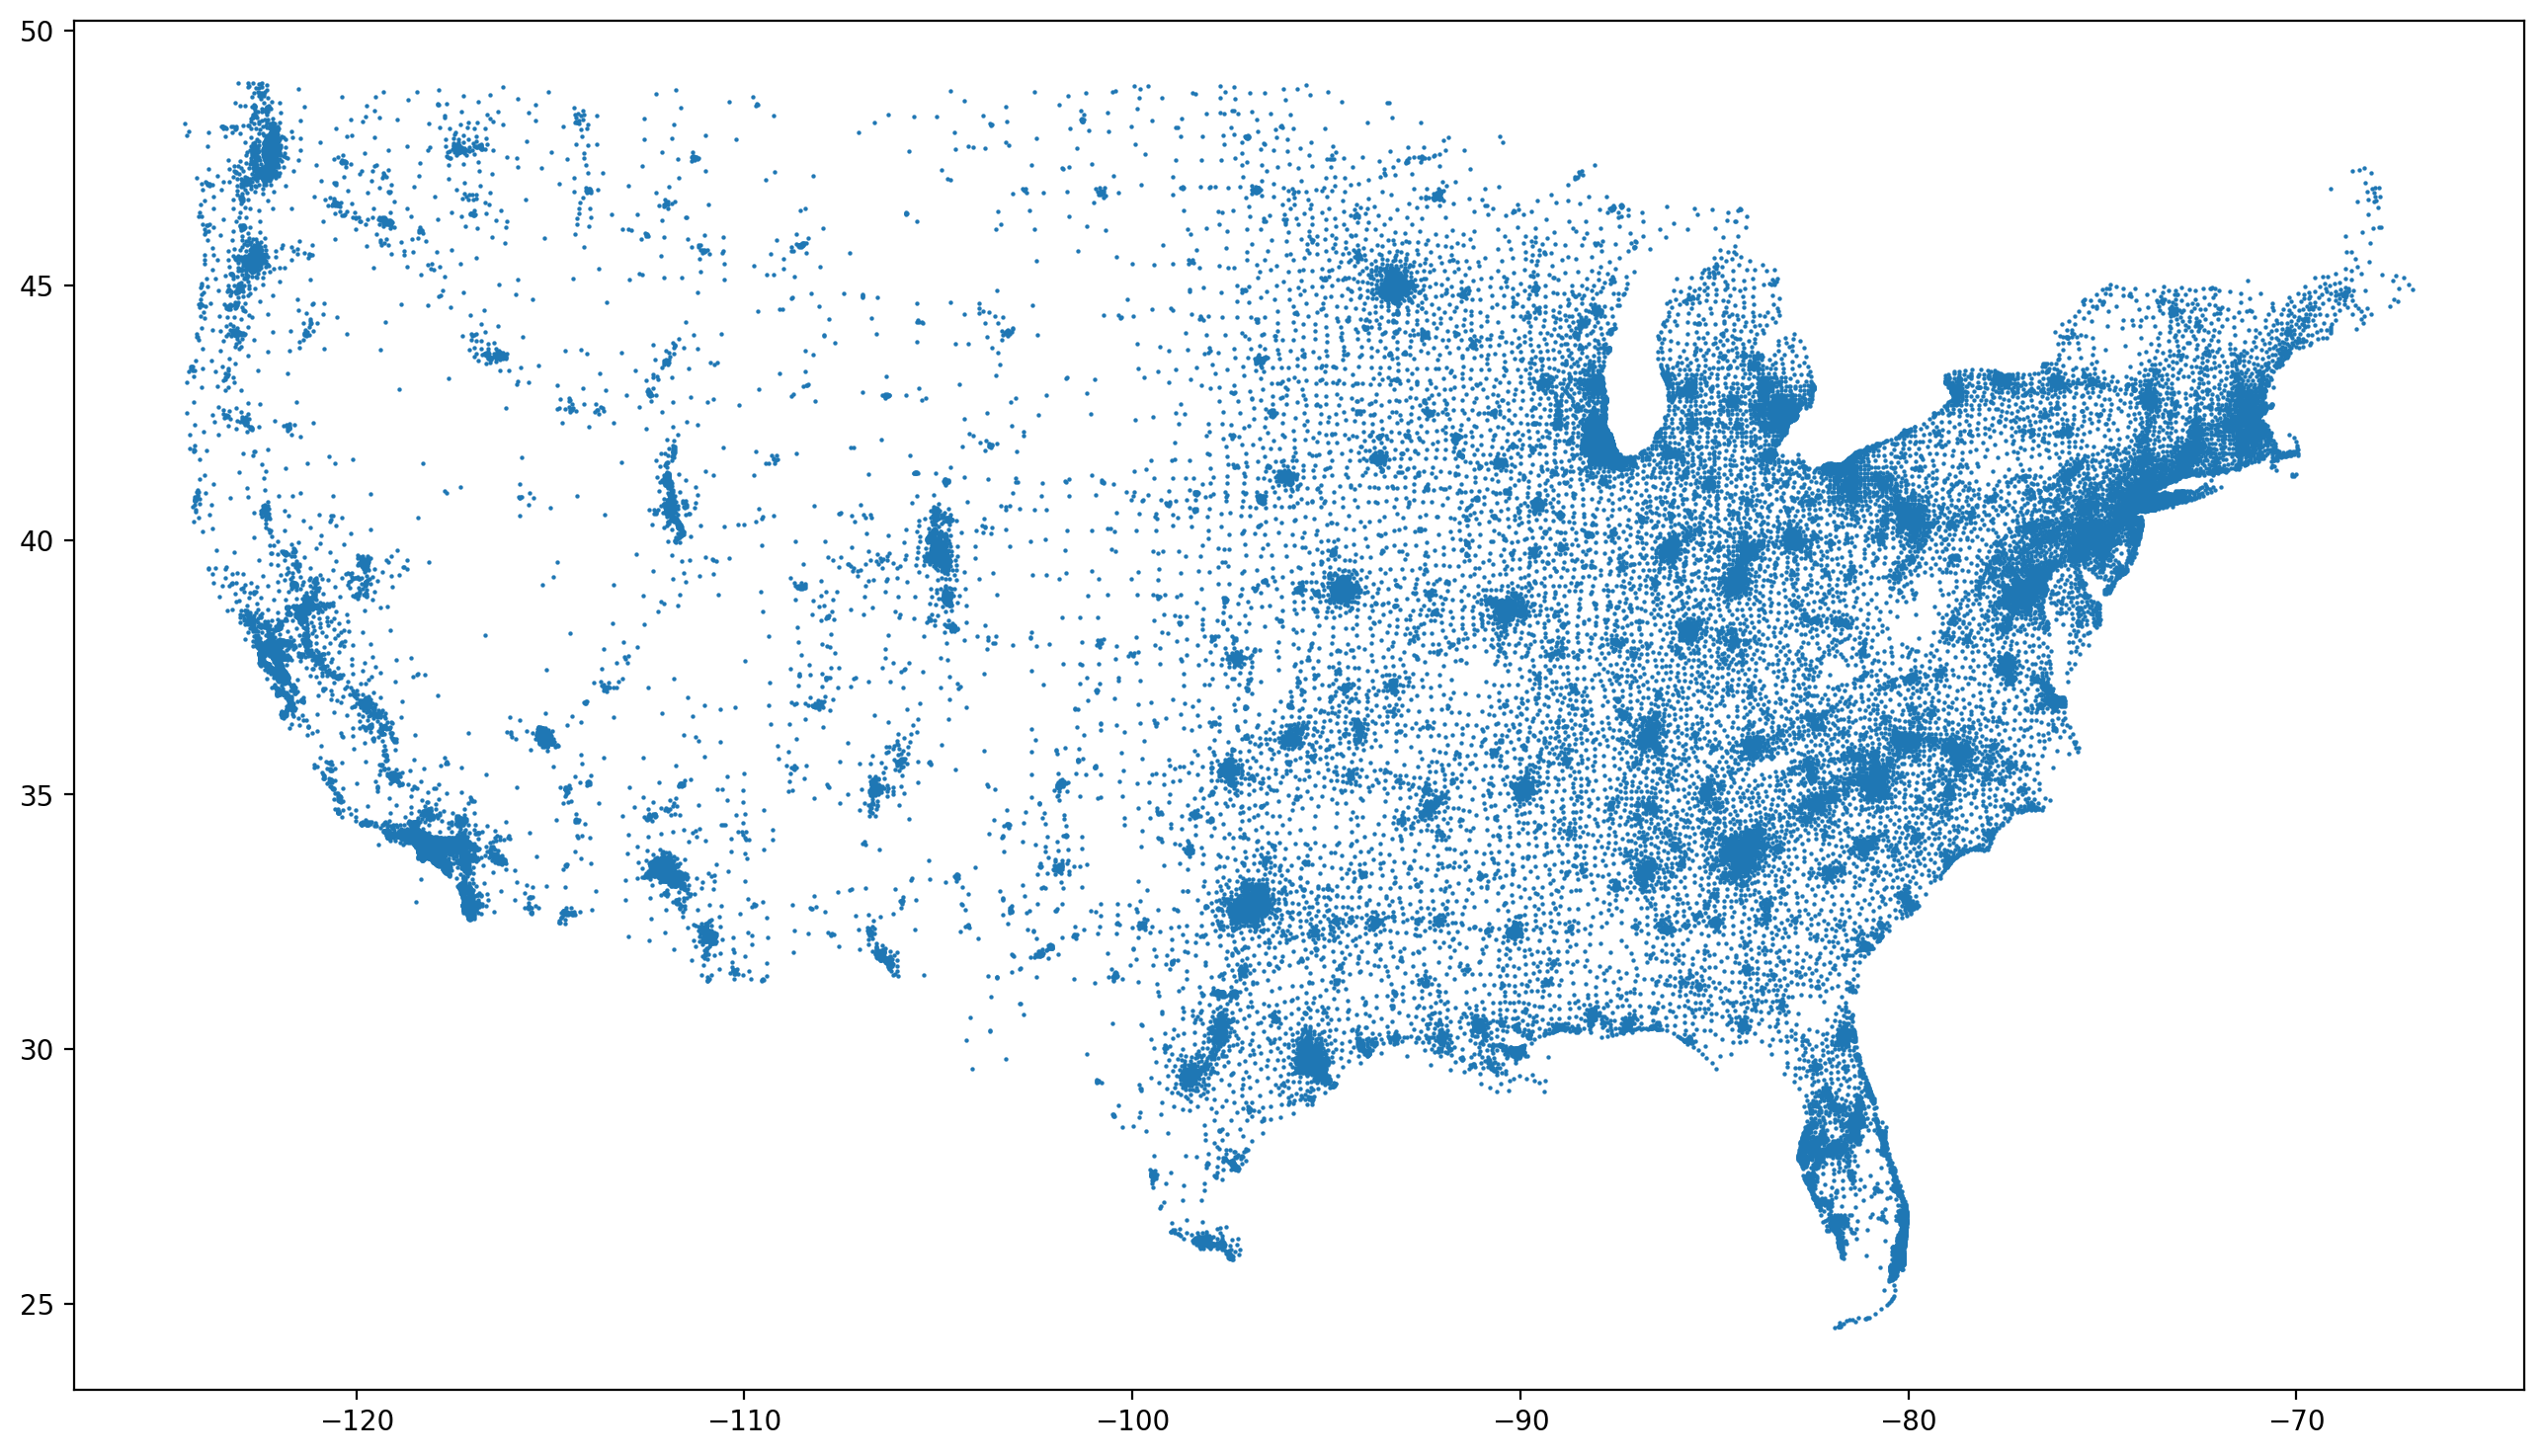

In [34]:
fig, ax = plt.subplots(1,1,figsize=(16,9),dpi=200)

ax.scatter(xs,ys,marker='.',lw=0,s=10)

plt.show()

In [35]:
## if you want state-based-coloring
statehood = nx.get_node_attributes(G,'state')

unique_states = np.unique(list(statehood.values()))
np.random.shuffle(unique_states)

nstates = len(unique_states)

cmap_cols = dict(zip(unique_states,plt.cm.tab20b(np.linspace(0,1,nstates))))
node_colors = [cmap_cols[com] for com in statehood.values()]

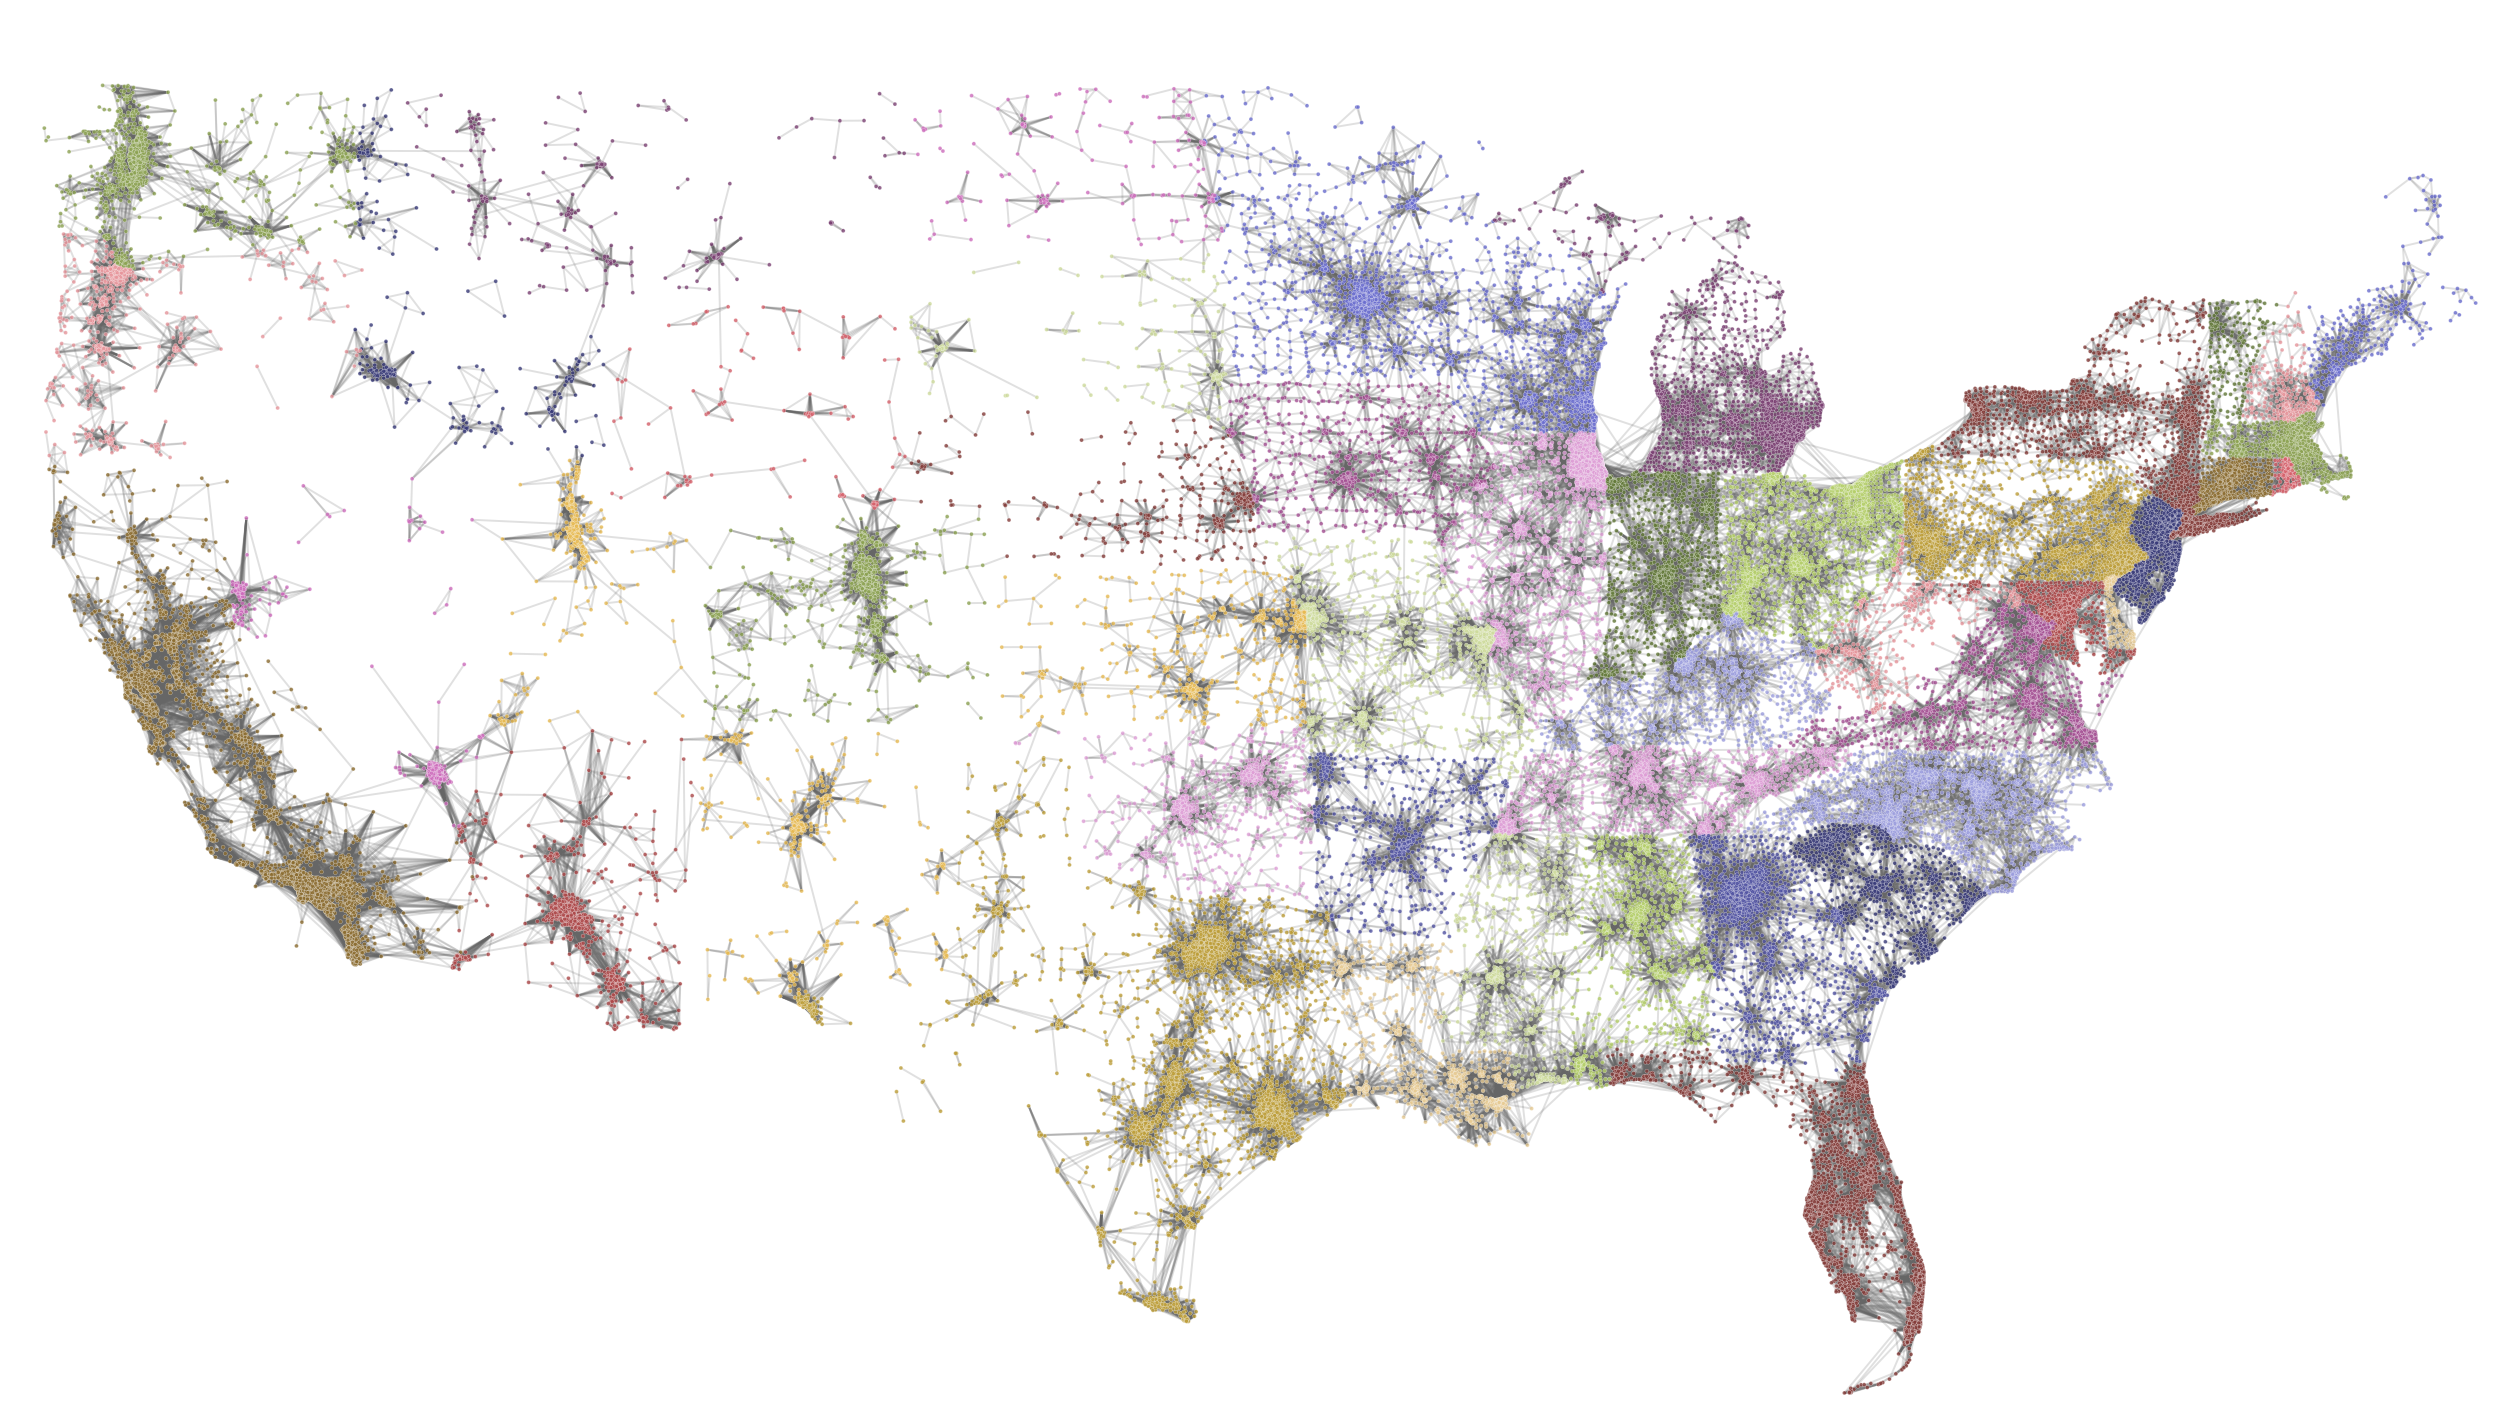

In [36]:
mult=1.0
fig, ax = plt.subplots(1,1,figsize=(16*mult,9*mult),dpi=200)

ns = 2.0
ew = 0.7
ec = '#666666'
nc = node_colors

nx.draw_networkx_edges(gp, pos, width=ew, edge_color=ec, ax=ax, alpha=0.2)
nx.draw_networkx_nodes(gp, pos, node_size=ns, node_color=nc, ax=ax, alpha=0.8,
                       edgecolors='w', linewidths=0.1)

ax.set_axis_off()

xdiff = max(xs)-min(xs)
ydiff = max(ys)-min(ys)

ax.set_ylim(min(ys)-ydiff*0.01, max(ys)+ydiff*0.05)
ax.set_xlim(min(xs)-xdiff*0.01, max(xs)+xdiff*0.01)

plt.savefig('images/pngs/USA_commutes.png', dpi=600, bbox_inches='tight')
plt.show()

![](images/economicgeography.png)

_____
### 2. Polysemy in Networks

![](images/polysemy.png)

In [37]:
fn = 'data/univ_language.txt'
data = pd.read_csv(fn, sep=' ', skiprows=1)
data.head()

Language            Region     Globe Abbreviation Var1  Var2  Var3  \
0  Khoisan  Southern_African  Southern         !Xóõ  nmn -24.0  21.5   
1  Khoisan  Southern_African  Southern         !Xóõ  nmn -24.0  21.5   
2  Khoisan  Southern_African  Southern         !Xóõ  nmn -24.0  21.5   
3  Khoisan  Southern_African  Southern         !Xóõ  nmn -24.0  21.5   
4  Khoisan  Southern_African  Southern         !Xóõ  nmn -24.0  21.5   

          Meaning            Word  
0        CLOUD(S)  !kx'ôe_ǁnàn-sâ  
1           RIVER     !náu_'|nṵ́m  
2     watercourse     !náu_'|nṵ́m  
3  amniotic_fluid           !qhàa  
4            rain           !qhàa

In [38]:
source = list(data.Meaning)
target = list(data.Word)
edgelist = list(zip(source, target))
G = nx.from_edgelist(edgelist)

In [51]:
import community
partition = community.best_partition(G)

comcols = ["#84e8d8","#ef7664","#59e19e","#e081d4","#71bc62","#a98ae5","#d3e671",
           "#6c96ef","#96af39","#53a4e5","#dd973f","#63c4e1","#c8b147","#b1b9e9",
           "#aca858","#ea7aa2","#bce59d","#d0a2d3","#71b990","#db9869","#799fc8",
           "#e6d59f","#5db1aa","#d89a98","#a1a776"]

colorzz = [comcols[com] for com in partition.values()]

AttributeError: module 'community' has no attribute 'best_partition'

***Warning -- the next line takes a few minutes to run.***

In [50]:
pos0 = nx.kamada_kawai_layout(G)
pos = nx.spring_layout(G, pos=pos0, iterations=1, k=0.05)

In [ ]:
ews = 2.5
degs = np.array(list(dict(G.degree()).values()))
ns = degs*17 + 25
fig, ax = plt.subplots(1,1,figsize=(15,15.5),dpi=200)

nx.draw_networkx_nodes(G, pos, node_size=ns, node_color=colorzz, linewidths=1.5, 
                       edgecolors='#f1f1f1', ax=ax)
nx.draw_networkx_edges(G, pos, edge_color="#999999", width=ews, alpha=0.35, ax=ax)

xx = [0.925,1.075]
ii = 0
for i in G.nodes():
    if G.degree(i) > np.quantile(degs,0.9885):
        if ii%2==0:
            rr = 0
        nudge = xx[rr]
        lab = i.lower()
        if lab == 'hi':
            lab = ''
        if lab == 'moon':
            nudge = nudge*0.9
        if lab == 'air':
            nudge = nudge*0.9
        if lab == 'sunlight':
            nudge = nudge*1.02
        if lab == 'ground':
            nudge = nudge*1.05
        if lab == 'country':
            nudge = nudge*0.875
        pos_i = {i:(pos[i][0]*nudge,pos[i][1]*nudge)}
        nx.draw_networkx_labels(G, pos_i, labels={i:lab}, 
                                font_size=0.12*G.degree(i)+14)#, font_weight='bold')
        ii += 1
        rr = 1

posx = list(zip(*list(pos.values())))[0]
posy = list(zip(*list(pos.values())))[1]
xrange = np.abs(max(posx)) + np.abs(min(posx))
yrange = np.abs(max(posy)) + np.abs(min(posy))
plt.xlim(min(posx)-xrange*0.025, max(posx)+xrange*0.025)
plt.ylim(min(posy)-yrange*0.025, max(posy)+yrange*0.05)
plt.axis('off')

plt.savefig('images/pngs/UniversalLanguage.png', bbox_inches='tight', dpi=425)
plt.savefig('images/pdfs/UniversalLanguage.pdf', bbox_inches='tight')
plt.show()

_________
## Bonus - Multilayer Network Visualization

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patheffects as path_effects
from mpl_toolkits.mplot3d.art3d import Line3DCollection

In [32]:
# let's start with the important stuff. pick your colors.
cols = ['steelblue', 'darksalmon', 'mediumseagreen']

In [33]:
np.random.seed(1)

In [34]:
# Imagine you have three node-aligned snapshots of a network
G1 = nx.karate_club_graph()
G2 = nx.karate_club_graph()
G3 = nx.karate_club_graph()

pos3 = nx.spring_layout(G1) # assuming common node location
graphs = [G1,G2, G3]

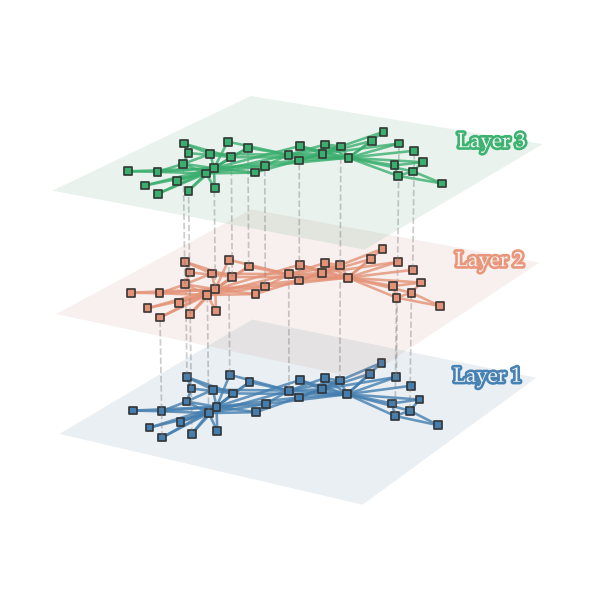

In [35]:
w = 9
h = 6

fig, ax = plt.subplots(1, 1, figsize=(w,h), dpi=125, subplot_kw={'projection':'3d'})

for gi, G in enumerate(graphs):
    # node positions
    xs = list(list(zip(*list(pos3.values())))[0])
    ys = list(list(zip(*list(pos3.values())))[1])
    zs = [gi]*len(xs) # set a common z-position of the nodes 

    # node colors
    cs = [cols[gi]]*len(xs)
    
    # if you want to have between-layer connections
    if gi > 0:
        thru_nodes = np.random.choice(list(G.nodes()),10,replace=False)
        lines3d_between = [(list(pos3[i])+[gi-1],list(pos3[i])+[gi]) for i in thru_nodes]
        between_lines = Line3DCollection(lines3d_between, zorder=gi, color='.5',
                                         alpha=0.4, linestyle='--', linewidth=1)
        ax.add_collection3d(between_lines)

    # add within-layer edges 
    lines3d = [(list(pos3[i])+[gi],list(pos3[j])+[gi]) for i,j in G.edges()]
    line_collection = Line3DCollection(lines3d, zorder=gi, color=cols[gi], alpha=0.8)
    ax.add_collection3d(line_collection)
    
    # now add nodes
    ax.scatter(xs, ys, zs, c=cs, edgecolors='.2', marker='s', alpha=1, zorder=gi+1)
    
    # add a plane to designate the layer
    xdiff = max(xs)-min(xs)
    ydiff = max(ys)-min(ys)
    ymin = min(ys)-ydiff*0.1
    ymax = max(ys)+ydiff*0.1
    xmin = min(xs)-xdiff*0.1 * (w/h)
    xmax = max(xs)+xdiff*0.1 * (w/h)
    xx, yy = np.meshgrid([xmin, xmax],[ymin, ymax])
    zz = np.zeros(xx.shape)+gi
    ax.plot_surface(xx, yy, zz, color=cols[gi], alpha=0.1, zorder=gi)

    # add label
    layertext = ax.text(0.0, 1.15, gi*0.95+0.5, "Layer %i"%(gi+1),
                        color='.95', fontsize='large', zorder=1e5, ha='left', va='center',
                        path_effects=[path_effects.Stroke(linewidth=3, foreground=cols[gi]),
                                      path_effects.Normal()])

# set them all at the same x,y,zlims
ax.set_ylim(min(ys)-ydiff*0.1,max(ys)+ydiff*0.1)
ax.set_xlim(min(xs)-xdiff*0.1,max(xs)+xdiff*0.1)
ax.set_zlim(-0.1, len(graphs) - 1 + 0.1)

# select viewing angle
angle = 30
height_angle = 20
ax.view_init(height_angle, angle)

# Optionally, adjust the 3D figure's aspect ratio or other properties for zoom
ax.set_box_aspect([4,4,3.25])  # Modify aspect ratio if necessary

ax.set_axis_off()

plt.savefig('images/pngs/multilayer_network.png',dpi=425,bbox_inches='tight')
plt.show()

In [52]:
import plotly.graph_objects as go
import numpy as np

# Assuming `graphs` is a list of networkx graphs and `pos3` is a dictionary of positions
# for nodes in each layer, similar to what you used in the Matplotlib version.

fig = go.Figure()

for gi, G in enumerate(graphs):
    # Extract node positions
    xs = np.array(list(zip(*list(pos3.values())))[0])
    ys = np.array(list(zip(*list(pos3.values())))[1])
    zs = np.full(len(xs), gi)  # Place nodes at the same z-level
    
    # Node colors
    cs = [cols[gi]] * len(xs)
    
    # Add nodes as scatter3d trace
    fig.add_trace(go.Scatter3d(
        x=xs, y=ys, z=zs,
        mode='markers',
        marker=dict(size=6, color=cs),
        name=f'Layer {gi+1}'
    ))
    
    # Add within-layer edges
    for edge in G.edges():
        i, j = edge
        x_edge = [pos3[i][0], pos3[j][0], None]  # None for breaks in Plotly lines
        y_edge = [pos3[i][1], pos3[j][1], None]
        z_edge = [gi, gi, None]
        
        fig.add_trace(go.Scatter3d(
            x=x_edge, y=y_edge, z=z_edge,
            mode='lines',
            line=dict(color=cols[gi], width=2),
            showlegend=False
        ))
    
    # Between-layer connections (if applicable)
    if gi > 0:
        thru_nodes = np.random.choice(list(G.nodes()), 10, replace=False)
        for node in thru_nodes:
            x_line = [pos3[node][0], pos3[node][0], None]
            y_line = [pos3[node][1], pos3[node][1], None]
            z_line = [gi-1, gi, None]
            
            fig.add_trace(go.Scatter3d(
                x=x_line, y=y_line, z=z_line,
                mode='lines',
                line=dict(color='gray', width=1, dash='dash'),
                showlegend=False
            ))

# Customize layout
fig.update_layout(
    scene=dict(
        xaxis=dict(showbackground=False),
        yaxis=dict(showbackground=False),
        zaxis=dict(showbackground=False),
    ),
    margin=dict(l=0, r=0, b=0, t=0),
    width=900,
    height=600
)

# Display the interactive plot
fig.show()


ModuleNotFoundError: No module named 'plotly'

__________
## Next time...
Intermediate Project Presentations!
_______

## References and further resources:

1. Class Webpages
    - Jupyter Book: https://asmithh.github.io/network-science-data-book/intro.html
    - Github: https://github.com/asmithh/network-science-data-book
    - Syllabus and course details: https://brennanklein.com/phys7332-fall24
2. Github! Find papers with figures that you like and stalk the authors' github pages! I'll start with a few from my own github... https://github.com/jkbren/networks-and-dataviz?tab=readme-ov-file. But send over any that you like and we'll add them to the list!